# АиСД-2, 2023, задание 5. Демков Михаил Кириллович БПИ212. Среда разработки - CLion
# Графики зависимости времени в наносекундах от размера массива
# Общие графики со всеми сортировками (12 штук)
## График для массивов с типом элементов "случайные 0-5" и размерами от 50 до 300.

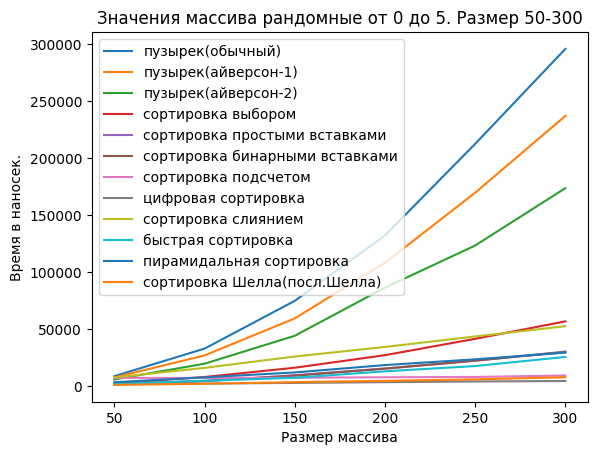

In [72]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("../tables/time_of_size.csv", sep=';')

random_0_5 = data[(data['Type of array'] == 'обычный 0-5') & (data['Array size'] <= 300)]

different_sorts = random_0_5['Sorting algorithm'].unique()


for sort_method in different_sorts:
    cur_sort = random_0_5[random_0_5['Sorting algorithm'] == sort_method]

    plt.plot(cur_sort['Array size'], cur_sort['Time(ns)'], label=str(sort_method))

plt.xlabel('Размер массива')
plt.ylabel('Время в наносек.')
plt.title('Значения массива рандомные от 0 до 5. Размер 50-300')

plt.legend()

plt.show()

Как можно заметить, на графике четко видно, на сколько **пузырьковая сортировка (даже с оптимизациями) медленнее остальных**, а кривые, соответствующие им, напоминают **параболы**. Попробуем вынести некоторые быстрые сортировки на отдельный график, который будет ниже, чтобы увидеть различие.

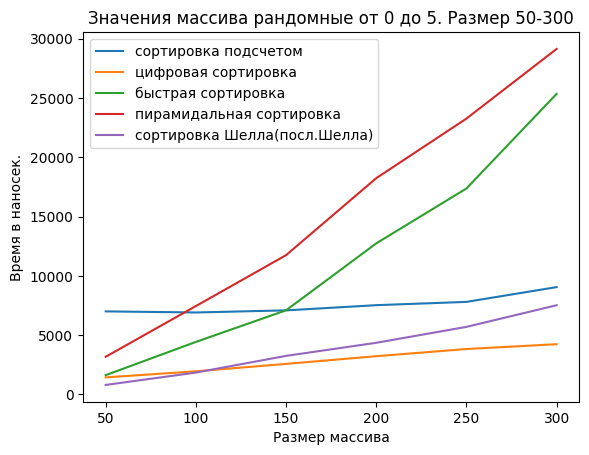

In [73]:
fast_sorts = ['сортировка Шелла(посл.Шелла)', 'пирамидальная сортировка', 'быстрая сортировка', 'цифровая сортировка', 'сортировка подсчетом']

for sort_method in different_sorts:
    if sort_method in fast_sorts:
        cur_sort = random_0_5[random_0_5['Sorting algorithm'] == sort_method]

        plt.plot(cur_sort['Array size'], cur_sort['Time(ns)'], label=str(sort_method))

plt.xlabel('Размер массива')
plt.ylabel('Время в наносек.')
plt.title('Значения массива рандомные от 0 до 5. Размер 50-300')

plt.legend()

plt.show()

Здесь можно заметить, что лучше всего себя показывает **цифровая сортировка** (судя по кривой можно сказать **O(n)**), а сортировка подсчетом очень медленно колеблется с изменением размеров массива - и это не странно, потому что для нее сложность всегда гарантирована O(4001), потому что диапазон чисел максимальный 0-4000. Так что неважно какого размера будет массив, цикл все равно пройдет через все 4001 элементов доп массива. **Именно поэтому если бы время можно было замерять какими-то эталонными способами без погрешностей, то линия была бы просто параллельна оси Ox**

## График для массивов с типом элементов "случайные 0-5" и размерами от 400 до 4100.

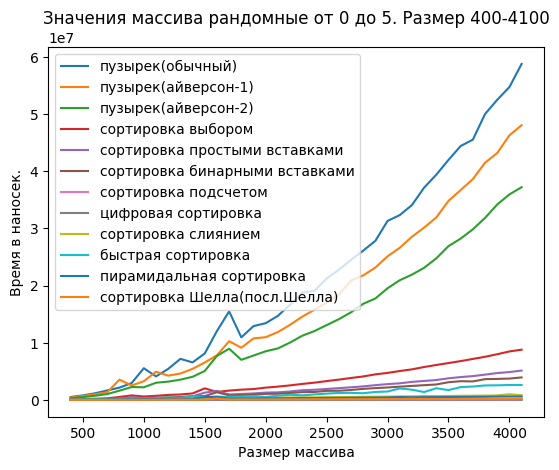

In [74]:
random_0_5 = data[(data['Type of array'] == 'обычный 0-5') & (data['Array size'] >= 400)]

different_sorts = random_0_5['Sorting algorithm'].unique()


for sort_method in different_sorts:
    cur_sort = random_0_5[random_0_5['Sorting algorithm'] == sort_method]

    plt.plot(cur_sort['Array size'], cur_sort['Time(ns)'], label=str(sort_method))

plt.xlabel('Размер массива')
plt.ylabel('Время в наносек.')
plt.title('Значения массива рандомные от 0 до 5. Размер 400-4100')

plt.legend()

plt.show()

Сразу выделим быстрые сортировки по аналогии с тем, что я делал раньше. (результат ниже)
Выборка стала больше, теперь можно увидеть, что **у всех сортировок появляются "выбросы".** Связано это с тем, что при замерах времени процессором выполняется большое число других вычислительных операций, а замерять время "в вакууме" не представляется возможным в домашних условиях. **Но главное заметить общую тенденцию - ожидаемая сложность на произвольных массивах соотвествует заявленной**

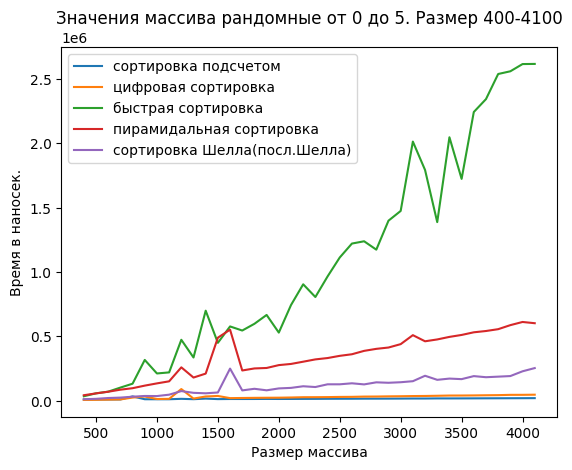

In [75]:
for sort_method in different_sorts:
    if sort_method in fast_sorts:
        cur_sort = random_0_5[random_0_5['Sorting algorithm'] == sort_method]

        plt.plot(cur_sort['Array size'], cur_sort['Time(ns)'], label=str(sort_method))

plt.xlabel('Размер массива')
plt.ylabel('Время в наносек.')
plt.title('Значения массива рандомные от 0 до 5. Размер 400-4100')

plt.legend()

plt.show()

_Меньше всего (если сравнивать с остальными) "скачет" сортировка подсчетом_ - это достаточно ожидаемо

## Графики для массивов с типом элементов "случайные 0-4000" и размерами от 50 до 300.

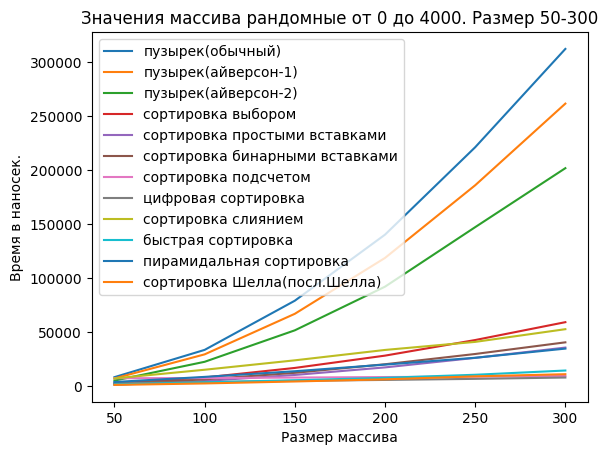

In [76]:
random_0_4000 = data[(data['Type of array'] == 'обычный 0-4000') & (data['Array size'] <= 300)]

different_sorts = random_0_4000['Sorting algorithm'].unique()


for sort_method in different_sorts:
    cur_sort = random_0_4000[random_0_4000['Sorting algorithm'] == sort_method]

    plt.plot(cur_sort['Array size'], cur_sort['Time(ns)'], label=str(sort_method))

plt.xlabel('Размер массива')
plt.ylabel('Время в наносек.')
plt.title('Значения массива рандомные от 0 до 4000. Размер 50-300')

plt.legend()

plt.show()

Здесь сложно увидеть разницу по сравнению с графиком для элементов 0-5, потому что числа не сильно различаются. Посмотрим сразу на более большой выборке

## Графики для массивов с типом элементов "случайные 0-4000" и размерами от 400 до 4100.

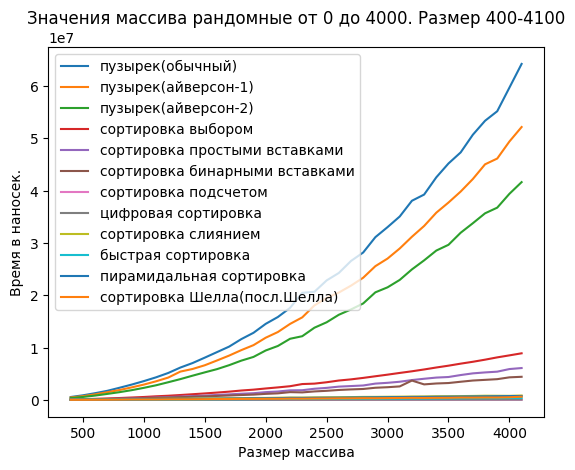

In [77]:
random_0_4000 = data[(data['Type of array'] == 'обычный 0-4000') & (data['Array size'] >= 400)]

different_sorts = random_0_4000['Sorting algorithm'].unique()


for sort_method in different_sorts:
    cur_sort = random_0_4000[random_0_4000['Sorting algorithm'] == sort_method]

    plt.plot(cur_sort['Array size'], cur_sort['Time(ns)'], label=str(sort_method))

plt.xlabel('Размер массива')
plt.ylabel('Время в наносек.')
plt.title('Значения массива рандомные от 0 до 4000. Размер 400-4100')

plt.legend()

plt.show()

Опять же появляются "вбросы", связанные с несовершенностью проводимых измерений

## Графики для массивов с типом элементов "почти отсортированны" (диапазон элементов я выбрал 0-4000) и размерами от 50 до 300.

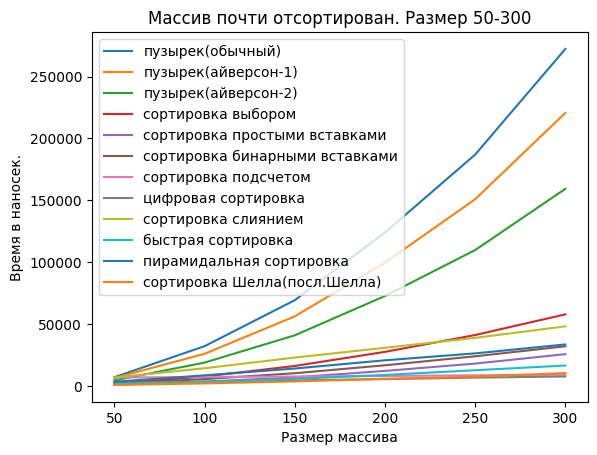

In [78]:
almost_sorted = data[(data['Type of array'] == 'почти отсорт. 0-4000') & (data['Array size'] <= 300)]

different_sorts = almost_sorted['Sorting algorithm'].unique()


for sort_method in different_sorts:
    cur_sort = almost_sorted[almost_sorted['Sorting algorithm'] == sort_method]

    plt.plot(cur_sort['Array size'], cur_sort['Time(ns)'], label=str(sort_method))

plt.xlabel('Размер массива')
plt.ylabel('Время в наносек.')
plt.title('Массив почти отсортирован. Размер 50-300')

plt.legend()

plt.show()

Тенденции все те же. _Пузырьковые сортировки работают дольше всего_
## Графики для массивов с типом элементов "почти отсортированны" (диапазон элементов я выбрал 0-4000) и размерами от 400 до 4100.

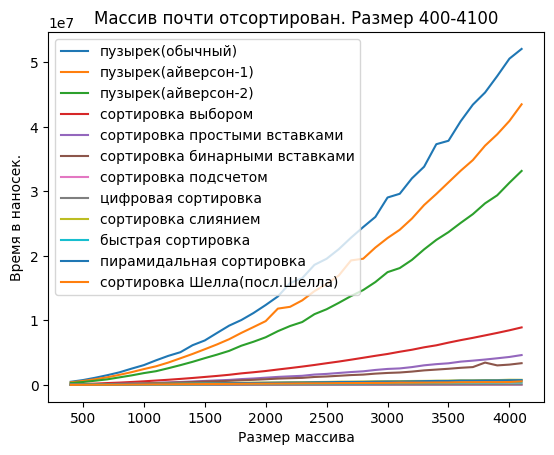

In [79]:
almost_sorted = data[(data['Type of array'] == 'почти отсорт. 0-4000') & (data['Array size'] >= 400)]

different_sorts = almost_sorted['Sorting algorithm'].unique()


for sort_method in different_sorts:
    cur_sort = almost_sorted[almost_sorted['Sorting algorithm'] == sort_method]

    plt.plot(cur_sort['Array size'], cur_sort['Time(ns)'], label=str(sort_method))

plt.xlabel('Размер массива')
plt.ylabel('Время в наносек.')
plt.title('Массив почти отсортирован. Размер 400-4100')

plt.legend()

plt.show()

Вынесем опять быстрые сортировки на отдельный график

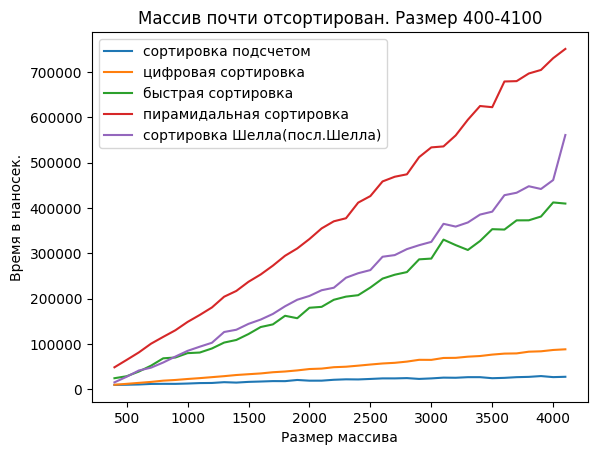

In [80]:
for sort_method in different_sorts:
    if sort_method in fast_sorts:
        cur_sort = almost_sorted[almost_sorted['Sorting algorithm'] == sort_method]

        plt.plot(cur_sort['Array size'], cur_sort['Time(ns)'], label=str(sort_method))

plt.xlabel('Размер массива')
plt.ylabel('Время в наносек.')
plt.title('Массив почти отсортирован. Размер 400-4100')

plt.legend()

plt.show()

Видим изменение - если раньше _пирамидальная сортировка_ была лучше быстрой, то сейчас все наоборот. **Пирамидальная сортировка гарантировано работает за O(nlogn)** неважно на каких данных, а вот быстрая здесь работает чуть быстрее в силу того, что т.к половина массива отсортирована, а за опорный мы берем первый, на первой половине массива не будет совершено ни одной перестановки

## Графики для обратно отсортированных массивов (диапазон элементов я выбрал 0-4000) и размерами от 50 до 300.

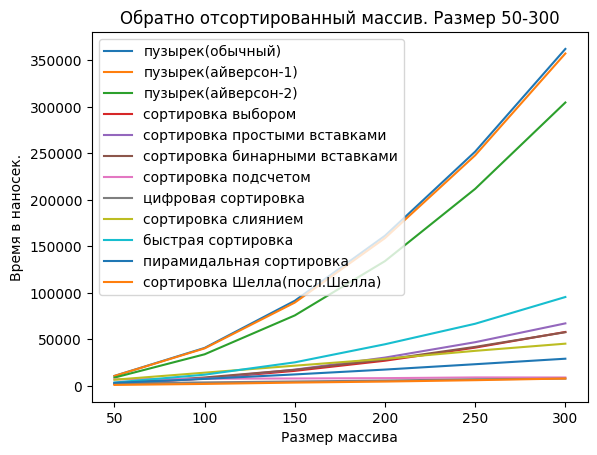

In [81]:
sorted_reverse = data[(data['Type of array'] == 'обратно отсорт.') & (data['Array size'] <= 300)]

different_sorts = sorted_reverse['Sorting algorithm'].unique()


for sort_method in different_sorts:
    cur_sort = sorted_reverse[sorted_reverse['Sorting algorithm'] == sort_method]

    plt.plot(cur_sort['Array size'], cur_sort['Time(ns)'], label=str(sort_method))

plt.xlabel('Размер массива')
plt.ylabel('Время в наносек.')
plt.title('Обратно отсортированный массив. Размер 50-300')

plt.legend()

plt.show()

**Обычный пузырек и с 1 условием Айверсона очень схожи**, пузырьковая со 2 условием Айверсона не так схожа с другими, но вообще на обратно отсортированных массивах в идеальном мире графики должны полностью совпадать. _Сортировка выбором стала работать медленнее в силу особенности ее реализации_ - на каждой итерации внешнего цикла мы ищем наименьший элемент, который всегда оказывается в конце и мы всегда будем идти до конца неотсортированной (по возрастанию) части массива 
## Графики для обратно отсортированных массивов (диапазон элементов я выбрал 0-4000) и размерами от 400 до 4100.

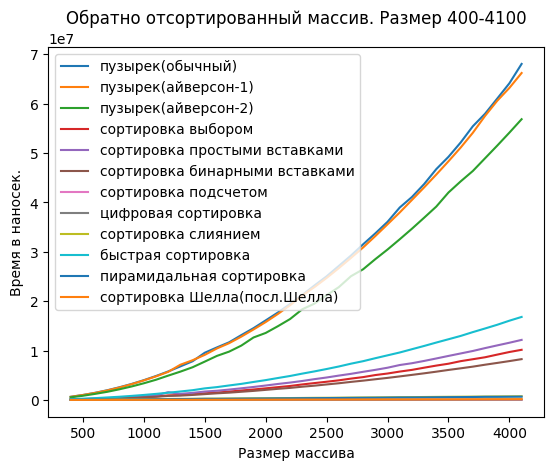

In [82]:
sorted_reverse = data[(data['Type of array'] == 'обратно отсорт.') & (data['Array size'] >= 400)]

different_sorts = sorted_reverse['Sorting algorithm'].unique()


for sort_method in different_sorts:
    cur_sort = sorted_reverse[sorted_reverse['Sorting algorithm'] == sort_method]

    plt.plot(cur_sort['Array size'], cur_sort['Time(ns)'], label=str(sort_method))

plt.xlabel('Размер массива')
plt.ylabel('Время в наносек.')
plt.title('Обратно отсортированный массив. Размер 400-4100')

plt.legend()

plt.show()

Здесь можно увидеть, что **медленнее стала сортировка простыми вставками** и это логично - ведь чтобы найти место линейным поиском для очередного элемента мы будем двигать все элементы в отсортированной части (т.к каждый новый для нас будет минимальным в уже отсортированной части)

# Построим графики для всех сортировок на массивах размеров 50-300
## Пузырьковая сортировка 

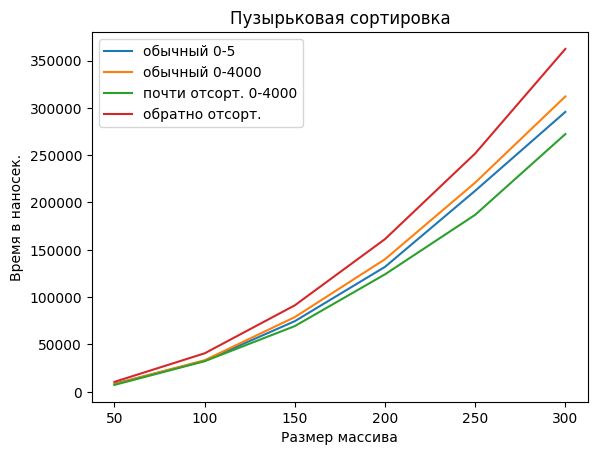

In [83]:
bubbleSort = data[(data['Sorting algorithm'] == 'пузырек(обычный)') & (data['Array size'] <= 300)]

array_types = bubbleSort['Type of array'].unique()

for array_type in array_types:
    array_type_rows = bubbleSort[bubbleSort['Type of array'] == array_type]
    plt.plot(array_type_rows['Array size'], array_type_rows['Time(ns)'], label=array_type)

plt.legend()
plt.title('Пузырьковая сортировка')
plt.xlabel('Размер массива')
plt.ylabel('Время в наносек.')
plt.show()

Судя по кривым для всех типов массивов можно сказать, что наблюдается _квадратичная зависимость_ (как и положено простому пузырьку). **Худший случай** - обратно отсортированный массив и это логично, ведь число обменов в нем наибольшее. **Самый лучший вариант** - почти отсортированный: это тоже было ожидаемо, т.к число обменов здесь наименьшее
## Пузырьковая сортировка (Айверсон-1)

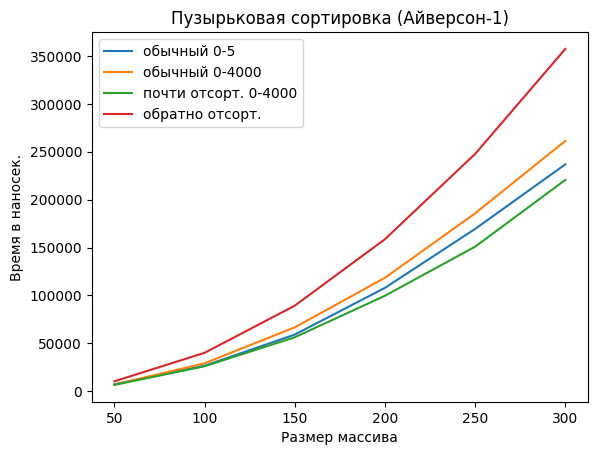

In [84]:
bubbleSort1 = data[(data['Sorting algorithm'] == 'пузырек(айверсон-1)') & (data['Array size'] <= 300)]

array_types = bubbleSort1['Type of array'].unique()

for array_type in array_types:
    array_type_rows = bubbleSort1[bubbleSort1['Type of array'] == array_type]
    plt.plot(array_type_rows['Array size'], array_type_rows['Time(ns)'], label=array_type)

plt.legend()
plt.title('Пузырьковая сортировка (Айверсон-1)')
plt.xlabel('Размер массива')
plt.ylabel('Время в наносек.')
plt.show()

Здесь как и без оптимизации ожидаемо **худшим случаем** является обратно отсортированный массив, а **лучшим** почти отсортированный. Больше смысла анализировать нет, разница должна быть получше ощутима на графиках с элементарными операциями
## Пузырьковая сортировка (Айверсон-2)

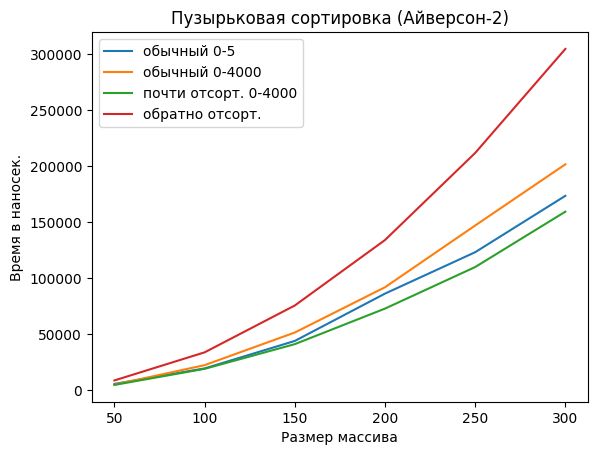

In [85]:
bubbleSort2 = data[(data['Sorting algorithm'] == 'пузырек(айверсон-2)') & (data['Array size'] <= 300)]

array_types = bubbleSort2['Type of array'].unique()

for array_type in array_types:
    array_type_rows = bubbleSort2[bubbleSort2['Type of array'] == array_type]
    plt.plot(array_type_rows['Array size'], array_type_rows['Time(ns)'], label=array_type)

plt.legend()
plt.title('Пузырьковая сортировка (Айверсон-2)')
plt.xlabel('Размер массива')
plt.ylabel('Время в наносек.')
plt.show()

Как и сказал выше, тут больше нечего комментировать
## Сортировка подсчетом

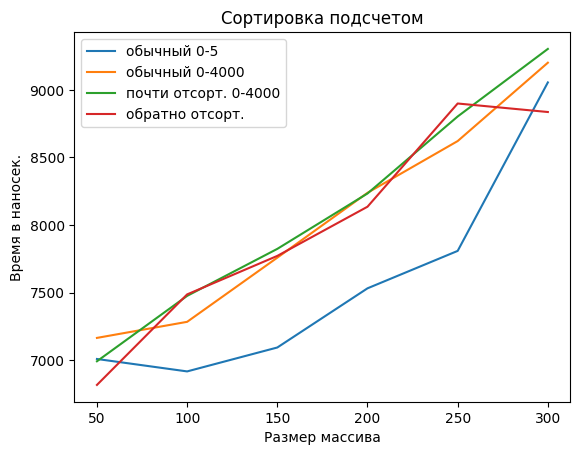

In [86]:
countingSort = data[(data['Sorting algorithm'] == 'сортировка подсчетом') & (data['Array size'] <= 300)]

array_types = countingSort['Type of array'].unique()

for array_type in array_types:
    array_type_rows = countingSort[countingSort['Type of array'] == array_type]
    plt.plot(array_type_rows['Array size'], array_type_rows['Time(ns)'], label=array_type)

plt.legend()
plt.title('Сортировка подсчетом')
plt.xlabel('Размер массива')
plt.ylabel('Время в наносек.')
plt.show()

Наблюдаются **стабильные выбросы**, более ярко выраженные чем, например, в сортировке пузырьком. Это может быть связано с тем, что в сортировке подсчетом выделяется и освобождается память под доп.массив, что сказывается на времени работы алгоритма
## Сортировка выбором

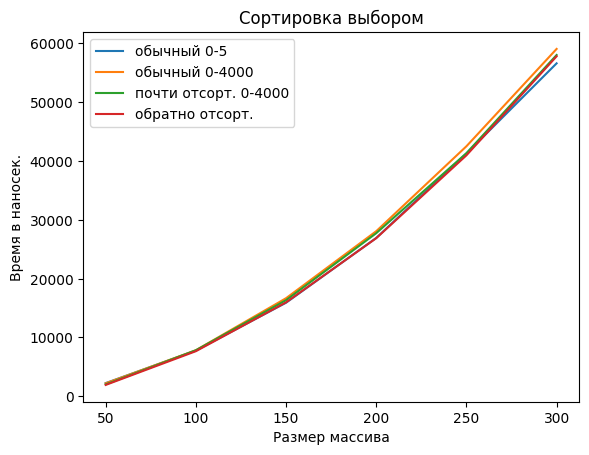

In [87]:
selectionSort = data[(data['Sorting algorithm'] == 'сортировка выбором') & (data['Array size'] <= 300)]

array_types = selectionSort['Type of array'].unique()

for array_type in array_types:
    array_type_rows = selectionSort[selectionSort['Type of array'] == array_type]
    plt.plot(array_type_rows['Array size'], array_type_rows['Time(ns)'], label=array_type)

plt.legend()
plt.title('Сортировка выбором')
plt.xlabel('Размер массива')
plt.ylabel('Время в наносек.')
plt.show()

На всех видах массива **результаты можно сказать приблизительно равны** и этого стоило ожидать, потому что мы идем слева направо по неотсортированной части массива и ищем минимум для текущего элемента, проходясь по всей части массива независимо от входных данных и без дополнительных оптимизаций
## Сортировка простыми вставками

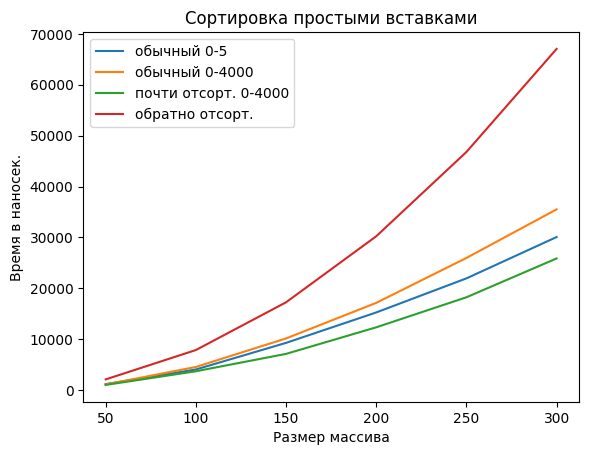

In [88]:
insertionSort = data[(data['Sorting algorithm'] == 'сортировка простыми вставками') & (data['Array size'] <= 300)]

array_types = insertionSort['Type of array'].unique()

for array_type in array_types:
    array_type_rows = insertionSort[insertionSort['Type of array'] == array_type]
    plt.plot(array_type_rows['Array size'], array_type_rows['Time(ns)'], label=array_type)

plt.legend()
plt.title('Сортировка простыми вставками')
plt.xlabel('Размер массива')
plt.ylabel('Время в наносек.')
plt.show()

**Худший случай - обратно отсортированный массив.** И в правду - когда массив отсортирован, чтобы найти место для вставки в отсортированную часть линейным поиском, нам нужно пройти все элементы отсортированной части (т.к тот что мы хотим вставить будет минимальным из всех). **Почти отсортированный массив - лучший случай**, так как половину элементов мы вообще не будем двигать
## Сортировка бинарными вставками

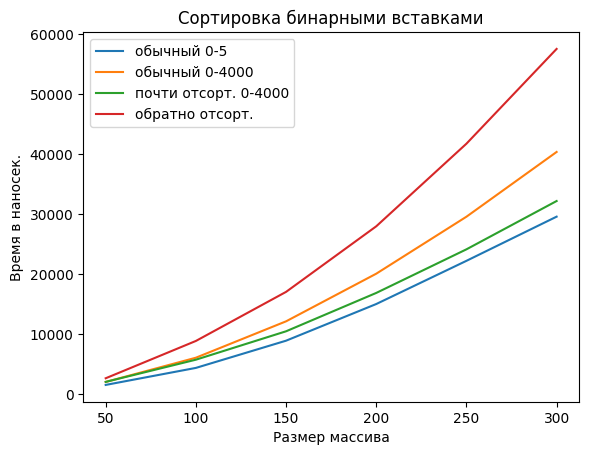

In [89]:
binaryInsertionSort = data[(data['Sorting algorithm'] == 'сортировка бинарными вставками') & (data['Array size'] <= 300)]

array_types = binaryInsertionSort['Type of array'].unique()

for array_type in array_types:
    array_type_rows = binaryInsertionSort[binaryInsertionSort['Type of array'] == array_type]
    plt.plot(array_type_rows['Array size'], array_type_rows['Time(ns)'], label=array_type)

plt.legend()
plt.title('Сортировка бинарными вставками')
plt.xlabel('Размер массива')
plt.ylabel('Время в наносек.')
plt.show()

Заметна общая разница по времени по сравнению с сортировкой обычными вставками, так как поиск для вставки осуществляется методом бинарного поиска (**O(logn**) вместо **O(n)** для поиска). **Худшие и лучшие случаи входных данных здесь тоже ожидаема и совпадает с сортировкой простыми вставками**
## Цифровая сортировка

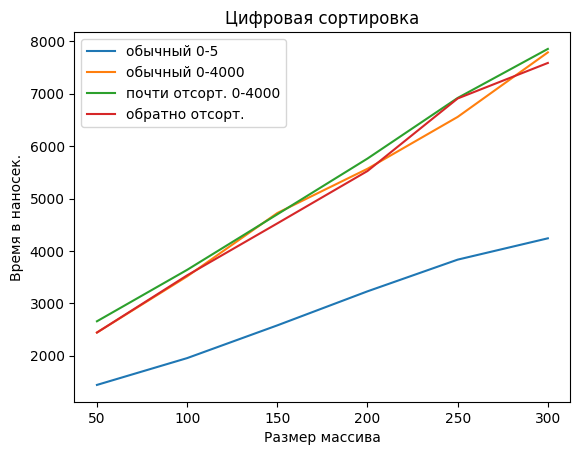

In [90]:
radixSort = data[(data['Sorting algorithm'] == 'цифровая сортировка') & (data['Array size'] <= 300)]

array_types = radixSort['Type of array'].unique()

for array_type in array_types:
    array_type_rows = radixSort[radixSort['Type of array'] == array_type]
    plt.plot(array_type_rows['Array size'], array_type_rows['Time(ns)'], label=array_type)

plt.legend()
plt.title('Цифровая сортировка')
plt.xlabel('Размер массива')
plt.ylabel('Время в наносек.')
plt.show()

Цифровая сортировка в случае сортировки разрядов подсчетом имеет линейную сложность O(n + k) и судя по кривым можно сказать, что необходимый эффект достигнут несмотря на несовершенность измерений. То, что **худший случай здесь как будто случайные числа от 0 до 5 - случайность и погрешность измерений.** По сути разницы быть не должно
## Сортировка слиянием

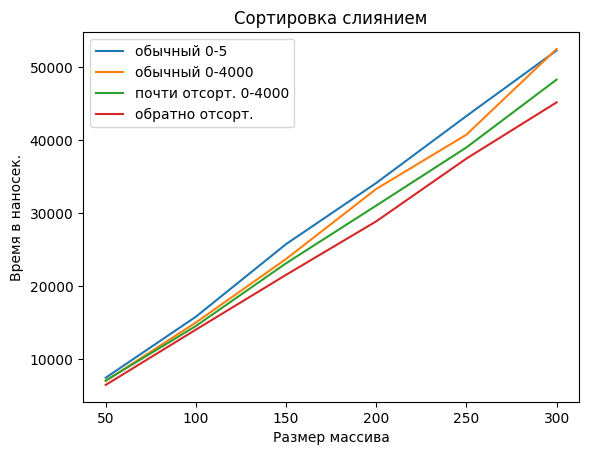

In [91]:
mergeSort = data[(data['Sorting algorithm'] == 'сортировка слиянием') & (data['Array size'] <= 300)]

array_types = mergeSort['Type of array'].unique()

for array_type in array_types:
    array_type_rows = mergeSort[mergeSort['Type of array'] == array_type]
    plt.plot(array_type_rows['Array size'], array_type_rows['Time(ns)'], label=array_type)

plt.legend()
plt.title('Сортировка слиянием')
plt.xlabel('Размер массива')
plt.ylabel('Время в наносек.')
plt.show()

Кривые очень похожие в силу того, что сортировке слиянием не важно, какой массив придет на вход. **Лучший случай здесь обратно отсортированный массив** в силу особенностей реализации сортировки (слияние массивов)
## Быстрая сортировка

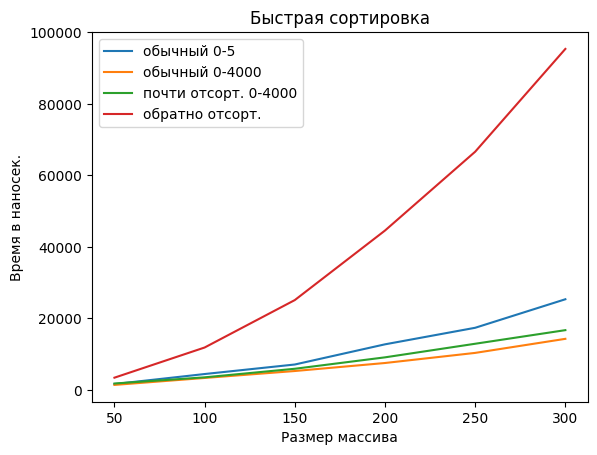

In [92]:
quickSort = data[(data['Sorting algorithm'] == 'быстрая сортировка') & (data['Array size'] <= 300)]

array_types = quickSort['Type of array'].unique()

for array_type in array_types:
    array_type_rows = quickSort[quickSort['Type of array'] == array_type]
    plt.plot(array_type_rows['Array size'], array_type_rows['Time(ns)'], label=array_type)

plt.legend()
plt.title('Быстрая сортировка')
plt.xlabel('Размер массива')
plt.ylabel('Время в наносек.')
plt.show()

**Худший случай для быстрой сортировки в нашей реализации с первым опорным элементов - это обратно отсортированный массив,** так как нам придется двигать все элементы влево от опорного каждый раз
## Пирамидальная сортировка

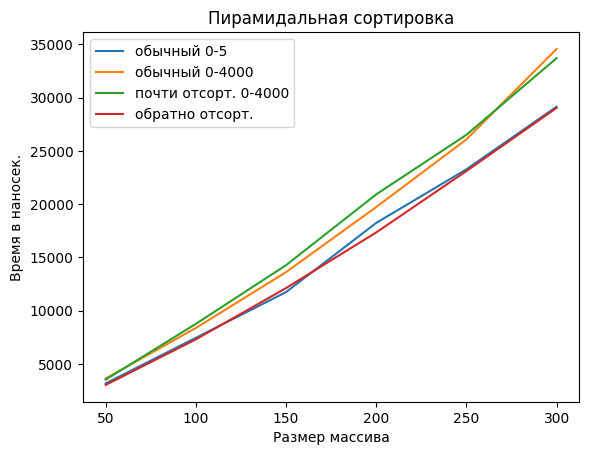

In [93]:
heapSort = data[(data['Sorting algorithm'] == 'пирамидальная сортировка') & (data['Array size'] <= 300)]

array_types = heapSort['Type of array'].unique()

for array_type in array_types:
    array_type_rows = heapSort[heapSort['Type of array'] == array_type]
    plt.plot(array_type_rows['Array size'], array_type_rows['Time(ns)'], label=array_type)

plt.legend()
plt.title('Пирамидальная сортировка')
plt.xlabel('Размер массива')
plt.ylabel('Время в наносек.')
plt.show()

Пирамидальная сортировка гарантировано имеет сложность **O(nlogn)** независимо от входных данных, поэтому все кривые примерно идентичные (как минимум по тенденции)
## Сортировка Шелла (последовательность Шелла)

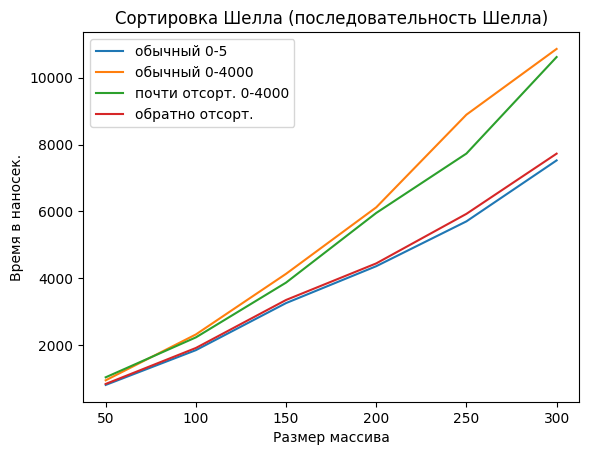

In [94]:
shellSort = data[(data['Sorting algorithm'] == 'сортировка Шелла(посл.Шелла)') & (data['Array size'] <= 300)]

array_types = shellSort['Type of array'].unique()

for array_type in array_types:
    array_type_rows = shellSort[shellSort['Type of array'] == array_type]
    plt.plot(array_type_rows['Array size'], array_type_rows['Time(ns)'], label=array_type)

plt.legend()
plt.title('Сортировка Шелла (последовательность Шелла)')
plt.xlabel('Размер массива')
plt.ylabel('Время в наносек.')
plt.show()

Графики различаются на концах, но связано это скорее с погрешностями измерений, в начале (до 150 размера) кривые примерно совпадали
# Построим графики для всех сортировок на массивах размеров 400-4100
## Пузырьковая сортировка 

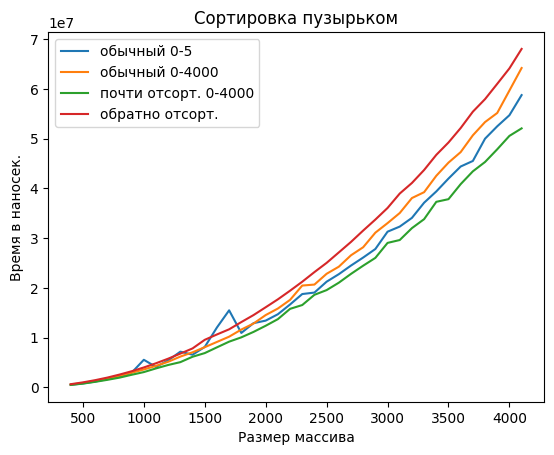

In [95]:
bubbleSort = data[(data['Sorting algorithm'] == 'пузырек(обычный)') & (data['Array size'] >= 400)]

array_types = bubbleSort['Type of array'].unique()

for array_type in array_types:
    array_type_rows = bubbleSort[bubbleSort['Type of array'] == array_type]
    plt.plot(array_type_rows['Array size'], array_type_rows['Time(ns)'], label=array_type)

plt.legend()
plt.title('Сортировка пузырьком')
plt.xlabel('Размер массива')
plt.ylabel('Время в наносек.')
plt.show()

**Ожидаемо худший случай - обратно отсортированный массив** из-за наибольшего числа обменов. Прослеживается квадратичная зависимость
## Пузырьковая сортировка (Айверсон-1)

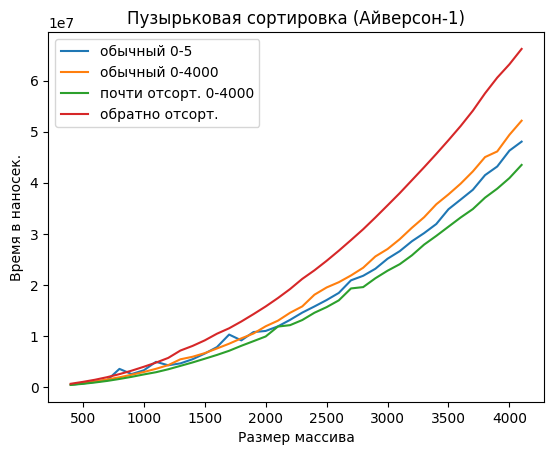

In [96]:
bubbleSort1 = data[(data['Sorting algorithm'] == 'пузырек(айверсон-1)') & (data['Array size'] >= 400)]

array_types = bubbleSort1['Type of array'].unique()

for array_type in array_types:
    array_type_rows = bubbleSort1[bubbleSort1['Type of array'] == array_type]
    plt.plot(array_type_rows['Array size'], array_type_rows['Time(ns)'], label=array_type)

plt.legend()
plt.title('Пузырьковая сортировка (Айверсон-1)')
plt.xlabel('Размер массива')
plt.ylabel('Время в наносек.')
plt.show()

Тут все также как и с обычным пузырьком, но верхняя граница времени стала чуть лучше, значит сортировка в среднем стала быстрее
## Пузырьковая сортировка (Айверсон-2)

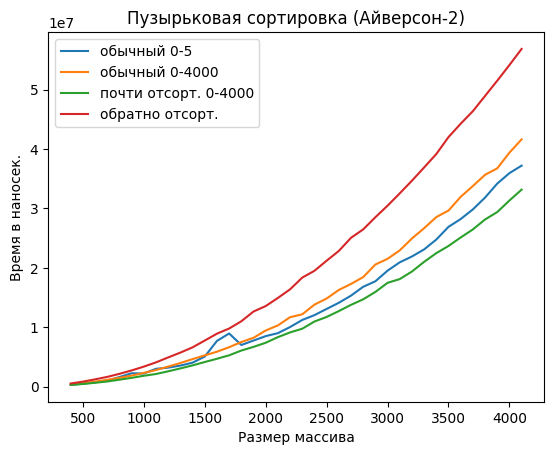

In [97]:
bubbleSort2 = data[(data['Sorting algorithm'] == 'пузырек(айверсон-2)') & (data['Array size'] >= 400)]

array_types = bubbleSort2['Type of array'].unique()

for array_type in array_types:
    array_type_rows = bubbleSort2[bubbleSort2['Type of array'] == array_type]
    plt.plot(array_type_rows['Array size'], array_type_rows['Time(ns)'], label=array_type)

plt.legend()
plt.title('Пузырьковая сортировка (Айверсон-2)')
plt.xlabel('Размер массива')
plt.ylabel('Время в наносек.')
plt.show()

Верхняя граница времени стала еще меньше, чем в обычном пузырьке. Также разница с худшим случаем стала более заметна
## Сортировка подсчетом

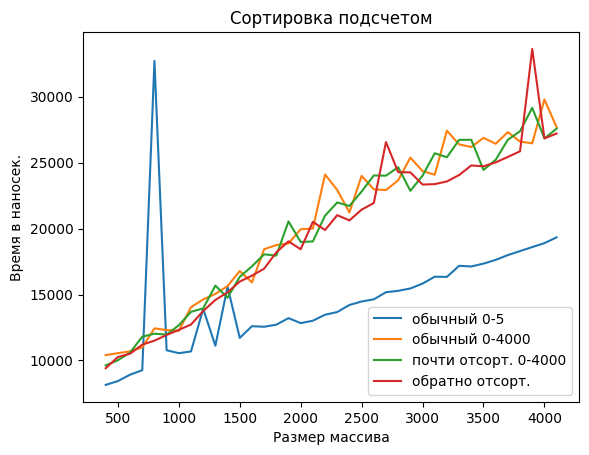

In [98]:
countingSort = data[(data['Sorting algorithm'] == 'сортировка подсчетом') & (data['Array size'] >= 400)]

array_types = countingSort['Type of array'].unique()

for array_type in array_types:
    array_type_rows = countingSort[countingSort['Type of array'] == array_type]
    plt.plot(array_type_rows['Array size'], array_type_rows['Time(ns)'], label=array_type)

plt.legend()
plt.title('Сортировка подсчетом')
plt.xlabel('Размер массива')
plt.ylabel('Время в наносек.')
plt.show()

Кривые на всех видах массива, кроме заполненного случайными числами от 0 до 5 очень схожи по тенденции, да и выброс очень нездоровый из чего делаю вывод, что **во время прогона массивов такого типа активно работал майнер либо троян... (шутка)**
## Сортировка выбором 

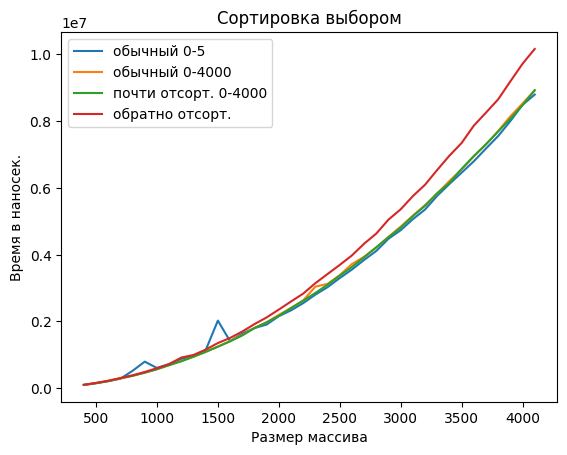

In [99]:
selectionSort = data[(data['Sorting algorithm'] == 'сортировка выбором') & (data['Array size'] >= 400)]

array_types = selectionSort['Type of array'].unique()

for array_type in array_types:
    array_type_rows = selectionSort[selectionSort['Type of array'] == array_type]
    plt.plot(array_type_rows['Array size'], array_type_rows['Time(ns)'], label=array_type)

plt.legend()
plt.title('Сортировка выбором')
plt.xlabel('Размер массива')
plt.ylabel('Время в наносек.')
plt.show()

**Худший случай здесь - обратно отсортированный массив,** так как чаще всего будет обновляться минимум для текущего элемента (он всегда будет всегда в конце неотсортированной части массива). Остальные кривые почти совпадают - этого стоило ожидать
## Сортировка простыми вставками

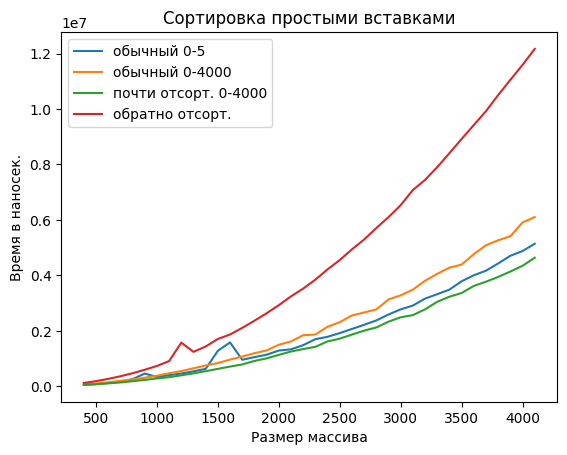

In [100]:
insertionSort = data[(data['Sorting algorithm'] == 'сортировка простыми вставками') & (data['Array size'] >= 400)]

array_types = insertionSort['Type of array'].unique()

for array_type in array_types:
    array_type_rows = insertionSort[insertionSort['Type of array'] == array_type]
    plt.plot(array_type_rows['Array size'], array_type_rows['Time(ns)'], label=array_type)

plt.legend()
plt.title('Сортировка простыми вставками')
plt.xlabel('Размер массива')
plt.ylabel('Время в наносек.')
plt.show()

**Худший случай здесь - обратно отсортированный массив** и это действительно так, ведь в этом случае для каждого нового элемента, который нужно вставить мы свапнемся m раз, где m - размер отсортированной части массива, чтобы очередной элемент (который больше всех отсортированных) встал в начало
## Сортировка бинарными вставками

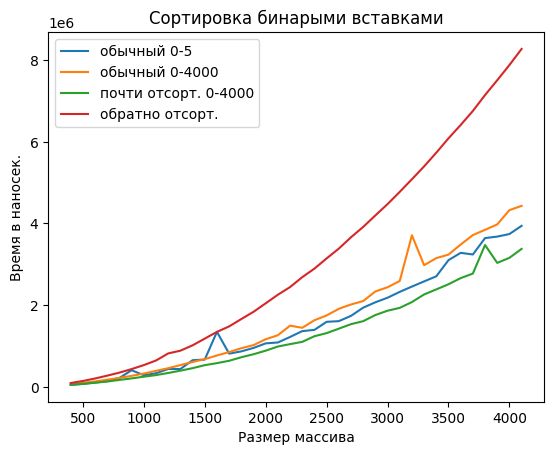

In [101]:
binaryInsertionSort = data[(data['Sorting algorithm'] == 'сортировка бинарными вставками') & (data['Array size'] >= 400)]

array_types = binaryInsertionSort['Type of array'].unique()

for array_type in array_types:
    array_type_rows = binaryInsertionSort[binaryInsertionSort['Type of array'] == array_type]
    plt.plot(array_type_rows['Array size'], array_type_rows['Time(ns)'], label=array_type)

plt.legend()
plt.title('Сортировка бинарыми вставками')
plt.xlabel('Размер массива')
plt.ylabel('Время в наносек.')
plt.show()

**Худший случай здесь такой же как и в обычных ставках, но верхняя граница времени существенно ниже.** А связано это с тем, что место для вставки теперь ищется не за **O(n)**, а за **O(logn)**
## Цифровая сортировка

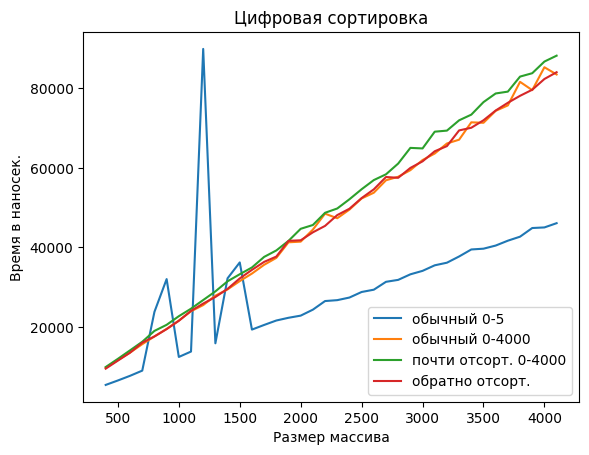

In [102]:
radixSort = data[(data['Sorting algorithm'] == 'цифровая сортировка') & (data['Array size'] >= 400)]

array_types = radixSort['Type of array'].unique()

for array_type in array_types:
    array_type_rows = radixSort[radixSort['Type of array'] == array_type]
    plt.plot(array_type_rows['Array size'], array_type_rows['Time(ns)'], label=array_type)

plt.legend()
plt.title('Цифровая сортировка')
plt.xlabel('Размер массива')
plt.ylabel('Время в наносек.')
plt.show()

**Выбросы при элементах от 0 до 5 напоминают вид сверху на голову слона - два больших уха и длинный хобот, а не то что могло показаться при первом просмотреть (извините за шутку, просто 6 час сижу делаю графики плавит).** А так в целом наблюдается схожесть наблюдений
## Сортировка слиянием

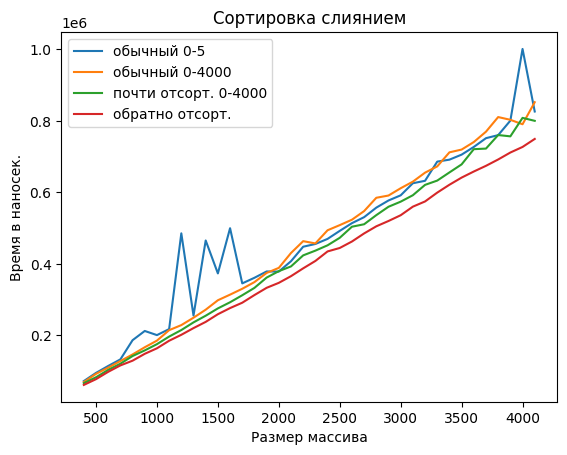

In [103]:
mergeSort = data[(data['Sorting algorithm'] == 'сортировка слиянием') & (data['Array size'] >= 400)]

array_types = mergeSort['Type of array'].unique()

for array_type in array_types:
    array_type_rows = mergeSort[mergeSort['Type of array'] == array_type]
    plt.plot(array_type_rows['Array size'], array_type_rows['Time(ns)'], label=array_type)

plt.legend()
plt.title('Сортировка слиянием')
plt.xlabel('Размер массива')
plt.ylabel('Время в наносек.')
plt.show()

Кривые достаточно схожи. **Лучший случай здесь обратно отсортированный массив** в силу особенностей реализации сортировки (слияние массивов)
## Быстрая сортировка

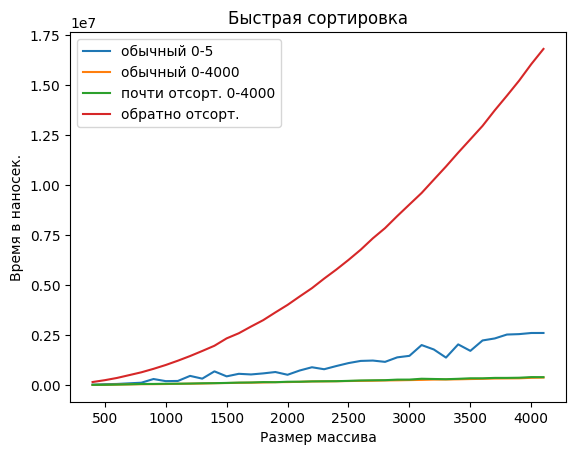

In [104]:
quickSort = data[(data['Sorting algorithm'] == 'быстрая сортировка') & (data['Array size'] >= 400)]

array_types = quickSort['Type of array'].unique()

for array_type in array_types:
    array_type_rows = quickSort[quickSort['Type of array'] == array_type]
    plt.plot(array_type_rows['Array size'], array_type_rows['Time(ns)'], label=array_type)

plt.legend()
plt.title('Быстрая сортировка')
plt.xlabel('Размер массива')
plt.ylabel('Время в наносек.')
plt.show()

**Худший случай - обратно отсортированный массив,** потому что в случае с первым опорным элементом нам придется вставлять все элементы левее опорного. Остальные вариации массивов схожи по времени работы - это достаточно ожидаемо
## Пирамидальная сортировка

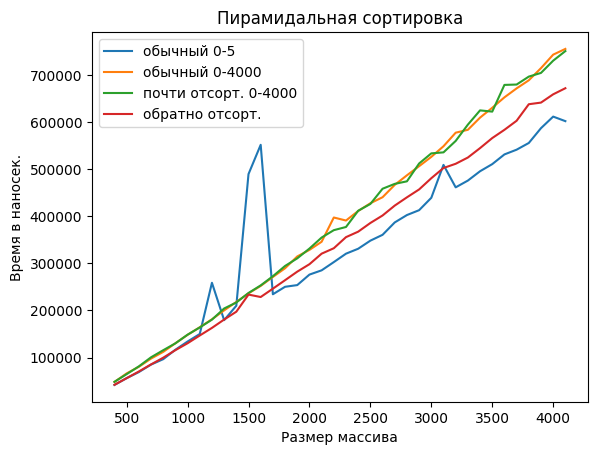

In [105]:
heapSort = data[(data['Sorting algorithm'] == 'пирамидальная сортировка') & (data['Array size'] >= 400)]

array_types = heapSort['Type of array'].unique()

for array_type in array_types:
    array_type_rows = heapSort[heapSort['Type of array'] == array_type]
    plt.plot(array_type_rows['Array size'], array_type_rows['Time(ns)'], label=array_type)

plt.legend()
plt.title('Пирамидальная сортировка')
plt.xlabel('Размер массива')
plt.ylabel('Время в наносек.')
plt.show()

Пирамидальная сортировка имеет доказанную **гарантированно сложность O(nlogn),** поэтому неважно какого вида массив будет на входе - кривые должны быть примерно одинаковыми, у нас так и получилось
## Сортировка Шелла (последовательность Шелла)

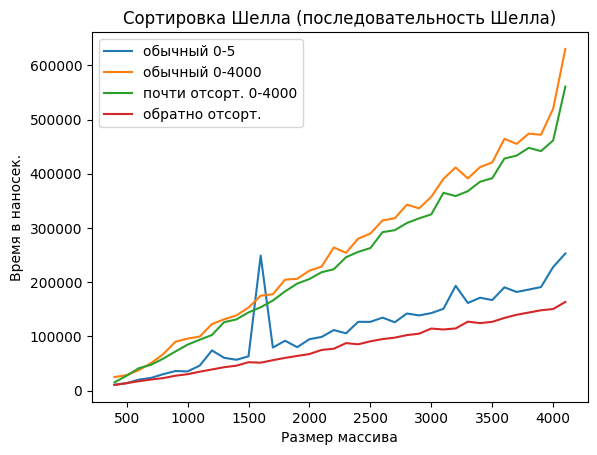

In [106]:
shellSort = data[(data['Sorting algorithm'] == 'сортировка Шелла(посл.Шелла)') & (data['Array size'] >= 400)]

array_types = shellSort['Type of array'].unique()

for array_type in array_types:
    array_type_rows = shellSort[shellSort['Type of array'] == array_type]
    plt.plot(array_type_rows['Array size'], array_type_rows['Time(ns)'], label=array_type)

plt.legend()
plt.title('Сортировка Шелла (последовательность Шелла)')
plt.xlabel('Размер массива')
plt.ylabel('Время в наносек.')
plt.show()

Сортировка Шелла на больших массивах работает достаточно быстро по сравнению с конкурентами. **Лучший случай - обратно отсортированный массив,** а связано это с тем, что за счет возможности сравнивать группы элементов (а не по 2 как во всех других сортировках, основанных на сравнениях), массив сортируется быстрее

# Графики зависимости количества элементраных операций от размерма массива. Как я считаю элементарные операции можно посмотреть в README.md (он лежит в корне проекта)

# Общие графики со всеми сортировками (12 штук)
# Графики для массивов с типом элементов "случайные 0-5" и размерами от 50 до 300.

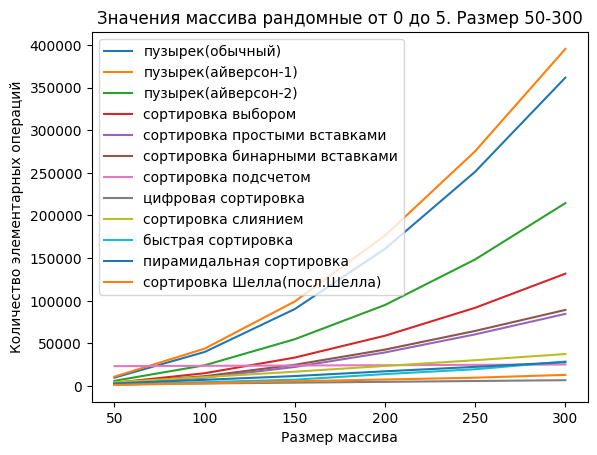

In [107]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("../tables/time_of_operations.csv", sep=';')

random_0_5 = data[(data['Type of array'] == 'обычный 0-5') & (data['Array size'] <= 300)]

different_sorts = random_0_5['Sorting algorithm'].unique()


for sort_method in different_sorts:
    cur_sort = random_0_5[random_0_5['Sorting algorithm'] == sort_method]

    plt.plot(cur_sort['Array size'], cur_sort['Elementary operations'], label=str(sort_method))

plt.xlabel('Размер массива')
plt.ylabel('Количество элементарных операций')
plt.title('Значения массива рандомные от 0 до 5. Размер 50-300')

plt.legend()

plt.show()

Наибольшое количество элементраных операций наблюдается при сортировках пузырьком обычным и с первым условием Айверсона. **Второе условие Айверсона дает существенный прирост в производительности,** снижая количество выполняемых операций в 1.5 - 2 раза. Рассмотрим наиболее "шустрые" сортировки покрупнее

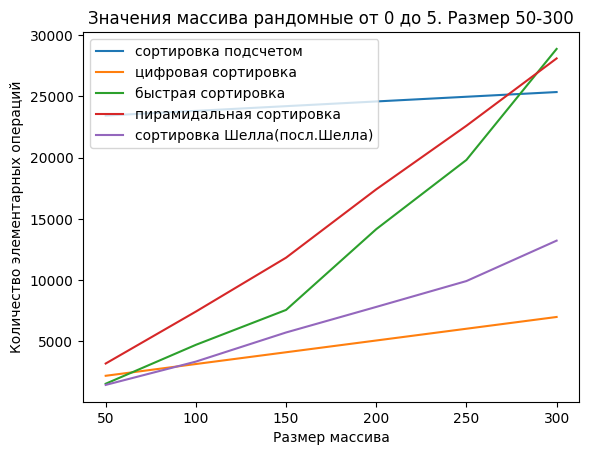

In [108]:
fast_sorts = ['сортировка Шелла(посл.Шелла)', 'пирамидальная сортировка', 'быстрая сортировка', 'цифровая сортировка', 'сортировка подсчетом']

for sort_method in different_sorts:
    if sort_method in fast_sorts:
        cur_sort = random_0_5[random_0_5['Sorting algorithm'] == sort_method]

        plt.plot(cur_sort['Array size'], cur_sort['Elementary operations'], label=str(sort_method))

plt.xlabel('Размер массива')
plt.ylabel('Количество элементарных операций')
plt.title('Значения массива рандомные от 0 до 5. Размер 50-300')

plt.legend()

plt.show()

Можно выделить несколько заметных особенностей:
* **кривая сортировки подсчетом почти параллельна оси Ox - так и должно быть, ведь в ее реализации размер массива не так важен как допустимый диапазон**
* **кривая пирамидальной сортировки напоминает график функции nlogn - это тоже ожидаемо, потому что сложность этого алгоритма гарантированно O(nlogn)**
* **цифровая сортировка является наиболее эффективной - это тоже закономерно, так как ее сложность близка к O(n)**
* **выбросов почти не наблюдается, так как подсчетом числа операций мы невелировали факт погрешностей в силу несовершенства вычислительных систем компьютера**

## График для массивов с типом элементов "случайные 0-5" и размерами от 400 до 4100.

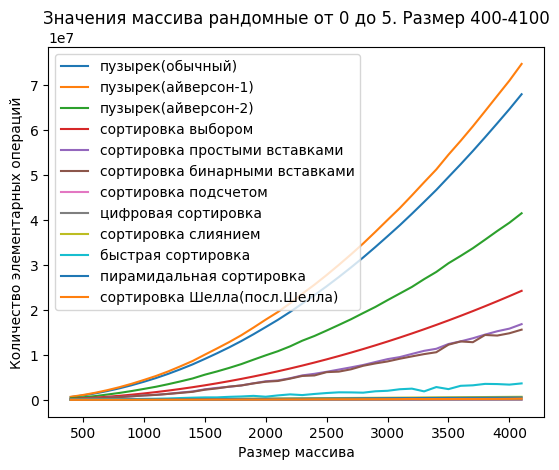

In [109]:
random_0_5 = data[(data['Type of array'] == 'обычный 0-5') & (data['Array size'] >= 400)]

different_sorts = random_0_5['Sorting algorithm'].unique()


for sort_method in different_sorts:
    cur_sort = random_0_5[random_0_5['Sorting algorithm'] == sort_method]

    plt.plot(cur_sort['Array size'], cur_sort['Elementary operations'], label=str(sort_method))

plt.xlabel('Размер массива')
plt.ylabel('Количество элементарных операций')
plt.title('Значения массива рандомные от 0 до 5. Размер 400-4100')

plt.legend()

plt.show()

Выводы те же, как и на предыдущем графике. Выбросов действительно очень мало, значит получилось минимизировать количество погрешностей

## Графики для массивов с типом элементов "случайные 0-4000" и размерами от 50 до 300.

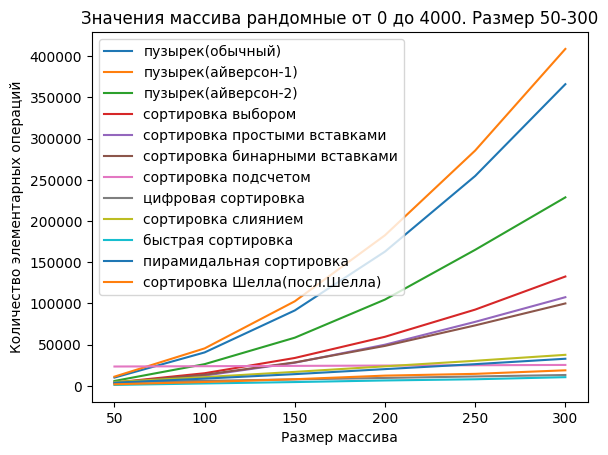

In [110]:
random_0_4000 = data[(data['Type of array'] == 'обычный 0-4000') & (data['Array size'] <= 300)]

different_sorts = random_0_4000['Sorting algorithm'].unique()


for sort_method in different_sorts:
    cur_sort = random_0_4000[random_0_4000['Sorting algorithm'] == sort_method]

    plt.plot(cur_sort['Array size'], cur_sort['Elementary operations'], label=str(sort_method))

plt.xlabel('Размер массива')
plt.ylabel('Количество элементарных операций')
plt.title('Значения массива рандомные от 0 до 4000. Размер 50-300')

plt.legend()

plt.show()

Здесь мало что поменялось в сравнении с диапазоном значений 0-5

## Графики для массивов с типом элементов "случайные 0-4000" и размерами от 400 до 4100.

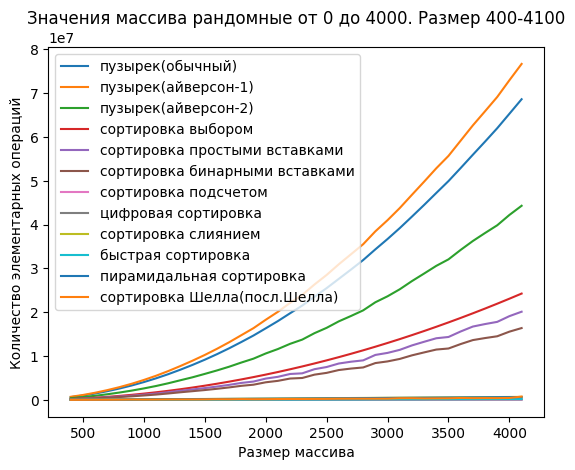

In [111]:
random_0_4000 = data[(data['Type of array'] == 'обычный 0-4000') & (data['Array size'] >= 400)]

different_sorts = random_0_4000['Sorting algorithm'].unique()


for sort_method in different_sorts:
    cur_sort = random_0_4000[random_0_4000['Sorting algorithm'] == sort_method]

    plt.plot(cur_sort['Array size'], cur_sort['Elementary operations'], label=str(sort_method))

plt.xlabel('Размер массива')
plt.ylabel('Количество элементарных операций')
plt.title('Значения массива рандомные от 0 до 4000. Размер 400-4100')

plt.legend()

plt.show()

Выбросы стали более заметными за счет увеличения выборки наблюдений в **примерно 7 раз**
## Графики для массивов с типом элементов "почти отсортированны" (диапазон элементов я выбрал 0-4000) и размерами от 50 до 300.

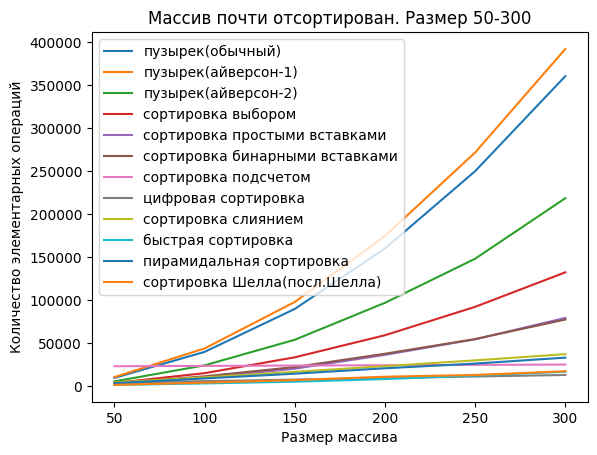

In [112]:
almost_sorted = data[(data['Type of array'] == 'почти отсорт. 0-4000') & (data['Array size'] <= 300)]

different_sorts = almost_sorted['Sorting algorithm'].unique()


for sort_method in different_sorts:
    cur_sort = almost_sorted[almost_sorted['Sorting algorithm'] == sort_method]

    plt.plot(cur_sort['Array size'], cur_sort['Elementary operations'], label=str(sort_method))

plt.xlabel('Размер массива')
plt.ylabel('Количество элементарных операций')
plt.title('Массив почти отсортирован. Размер 50-300')

plt.legend()

plt.show()

Здесь больше всего операций выполняется в сортировке пузырьком с первым условием Айверсона, а связано это с тем, что выполняется много проверок "были ли обмены" и много изменений самого флага
## Графики для массивов с типом элементов "почти отсортированны" (диапазон элементов я выбрал 0-4000) и размерами от 400 до 4100.

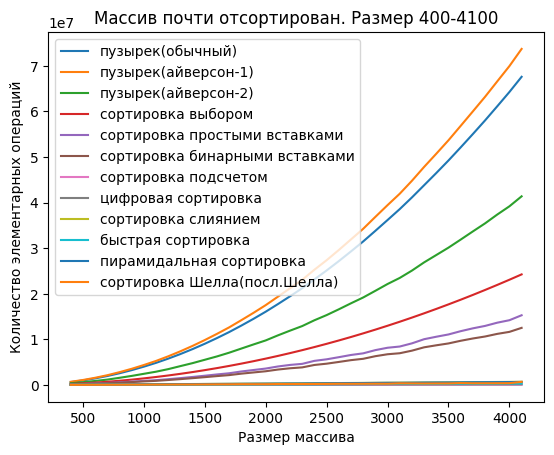

In [113]:
almost_sorted = data[(data['Type of array'] == 'почти отсорт. 0-4000') & (data['Array size'] >= 400)]

different_sorts = almost_sorted['Sorting algorithm'].unique()


for sort_method in different_sorts:
    cur_sort = almost_sorted[almost_sorted['Sorting algorithm'] == sort_method]

    plt.plot(cur_sort['Array size'], cur_sort['Elementary operations'], label=str(sort_method))

plt.xlabel('Размер массива')
plt.ylabel('Количество элементарных операций')
plt.title('Массив почти отсортирован. Размер 400-4100')

plt.legend()

plt.show()

Тенденции все такие же, так и должно быть. **Изменение диапазона чисел не приводит к уменьшению элементарных операций**
## Графики для обратно отсортированных массивов (диапазон элементов я выбрал 0-4000) и размерами от 50 до 300.

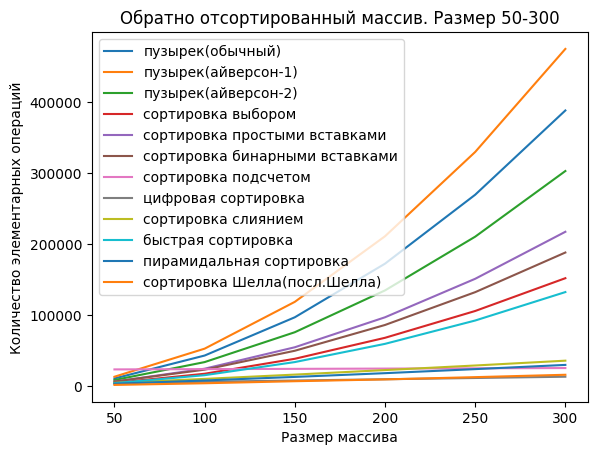

In [114]:
sorted_reverse = data[(data['Type of array'] == 'обратно отсорт.') & (data['Array size'] <= 300)]

different_sorts = sorted_reverse['Sorting algorithm'].unique()


for sort_method in different_sorts:
    cur_sort = sorted_reverse[sorted_reverse['Sorting algorithm'] == sort_method]

    plt.plot(cur_sort['Array size'], cur_sort['Elementary operations'], label=str(sort_method))

plt.xlabel('Размер массива')
plt.ylabel('Количество элементарных операций')
plt.title('Обратно отсортированный массив. Размер 50-300')

plt.legend()

plt.show()

Количество элементарных операций увеличилось для всех сортировок, основанных на обменах - это логично, так как если массив отсортирован в обратном порядке, нам нужно произвести больше обменов, чтобы отсортировать его так как надо
## Графики для обратно отсортированных массивов (диапазон элементов я выбрал 0-4000) и размерами от 400 до 4100.

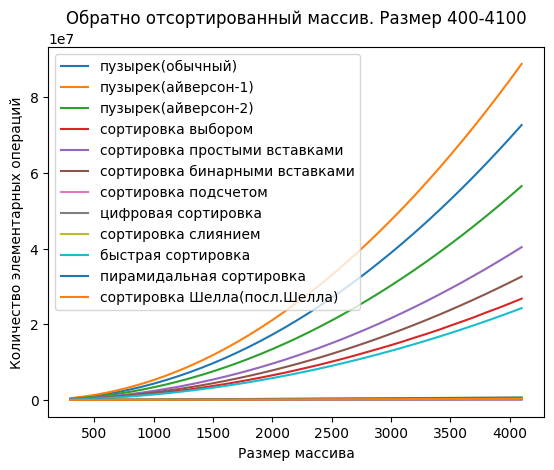

In [115]:
sorted_reverse = data[(data['Type of array'] == 'обратно отсорт.') & (data['Array size'] >= 300)]

different_sorts = sorted_reverse['Sorting algorithm'].unique()


for sort_method in different_sorts:
    cur_sort = sorted_reverse[sorted_reverse['Sorting algorithm'] == sort_method]

    plt.plot(cur_sort['Array size'], cur_sort['Elementary operations'], label=str(sort_method))

plt.xlabel('Размер массива')
plt.ylabel('Количество элементарных операций')
plt.title('Обратно отсортированный массив. Размер 400-4100')

plt.legend()

plt.show()

**Число операций стало в разы больше в силу увеличения размера прогноняемых массивов**
# Построим графики для всех сортировок на массивах размеров 50-300
## Пузырьковая сортировка

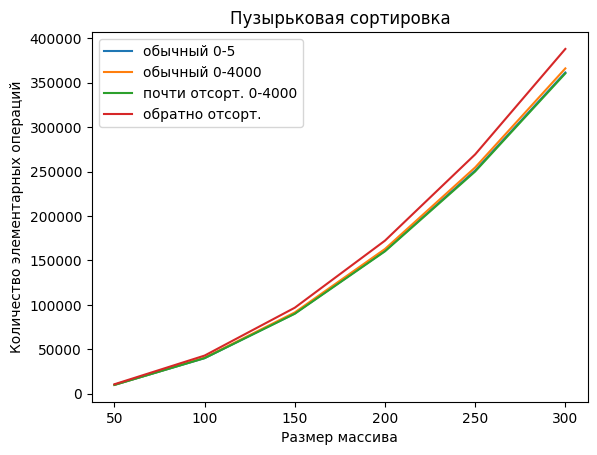

In [116]:
bubbleSort = data[(data['Sorting algorithm'] == 'пузырек(обычный)') & (data['Array size'] <= 300)]

array_types = bubbleSort['Type of array'].unique()

for array_type in array_types:
    array_type_rows = bubbleSort[bubbleSort['Type of array'] == array_type]
    plt.plot(array_type_rows['Array size'], array_type_rows['Elementary operations'], label=array_type)

plt.legend()
plt.title('Пузырьковая сортировка')
plt.xlabel('Размер массива')
plt.ylabel('Количество элементарных операций')
plt.show()

**Все виды массива, кроме обратно отсортированного, очень схожи по числу выполняемых операций** - это ожидаемо, а обратно отсортированный выполняет больше всего операций, так как происходит больше всего обменов

## Пузырьковая сортировка (Айверсон-1)

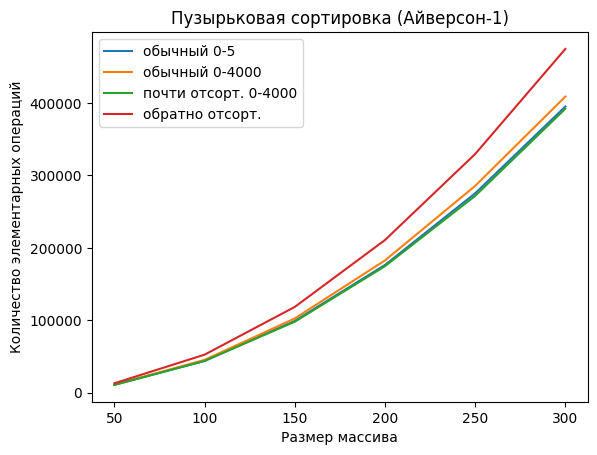

In [117]:
sort = data[(data['Sorting algorithm'] == 'пузырек(айверсон-1)') & (data['Array size'] <= 300)]

array_types = sort['Type of array'].unique()

for array_type in array_types:
    array_type_rows = sort[sort['Type of array'] == array_type]
    plt.plot(array_type_rows['Array size'], array_type_rows['Elementary operations'], label=array_type)

plt.legend()
plt.title('Пузырьковая сортировка (Айверсон-1)')
plt.xlabel('Размер массива')
plt.ylabel('Количество элементарных операций')
plt.show()

Общее число операций стало больше, так как появилась проверка и постоянное изменение "статуса" флага
## Пузырьковая сортировка (Айверсон-2)

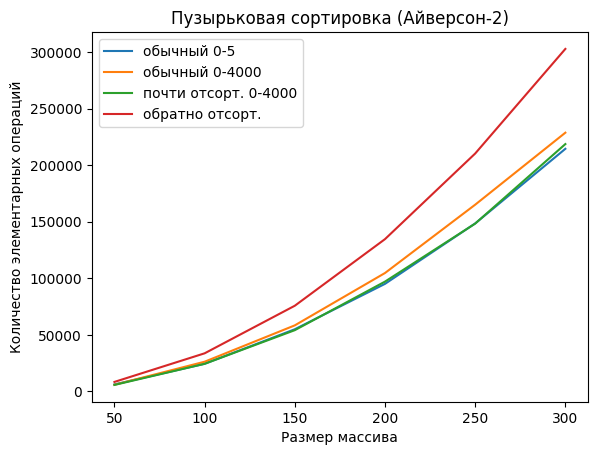

In [118]:
sort = data[(data['Sorting algorithm'] == 'пузырек(айверсон-2)') & (data['Array size'] <= 300)]

array_types = sort['Type of array'].unique()

for array_type in array_types:
    array_type_rows = sort[sort['Type of array'] == array_type]
    plt.plot(array_type_rows['Array size'], array_type_rows['Elementary operations'], label=array_type)

plt.legend()
plt.title('Пузырьковая сортировка (Айверсон-2)')
plt.xlabel('Размер массива')
plt.ylabel('Количество элементарных операций')
plt.show()

Общее число операций снизилось, так как теперь на каждой итерации внутреннего цикла мы проходим меньшее число элементов.
## Сортировка подсчетом

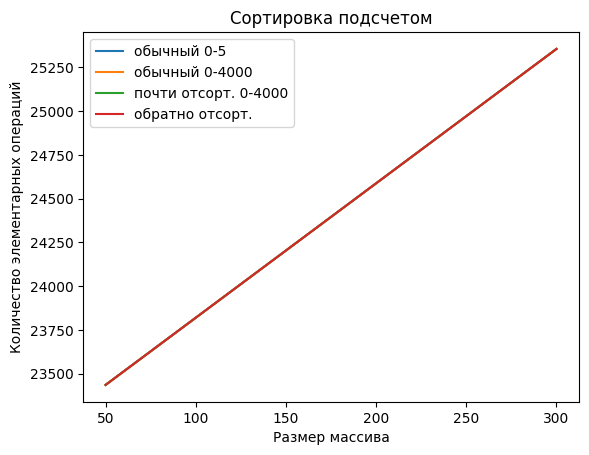

In [119]:
sort = data[(data['Sorting algorithm'] == 'сортировка подсчетом') & (data['Array size'] <= 300)]

array_types = sort['Type of array'].unique()

for array_type in array_types:
    array_type_rows = sort[sort['Type of array'] == array_type]
    plt.plot(array_type_rows['Array size'], array_type_rows['Elementary operations'], label=array_type)

plt.legend()
plt.title('Сортировка подсчетом')
plt.xlabel('Размер массива')
plt.ylabel('Количество элементарных операций')
plt.show()

Полное совпадение при сортировки подсчетом для любых массивов связано с тем, что неважно какие там элементы, сложность всегда будет одна и та же. Количество операций также невелико. **И еще видна линейная зависимость - это по определению сортировки подсчетом**
## Сортировка выбором

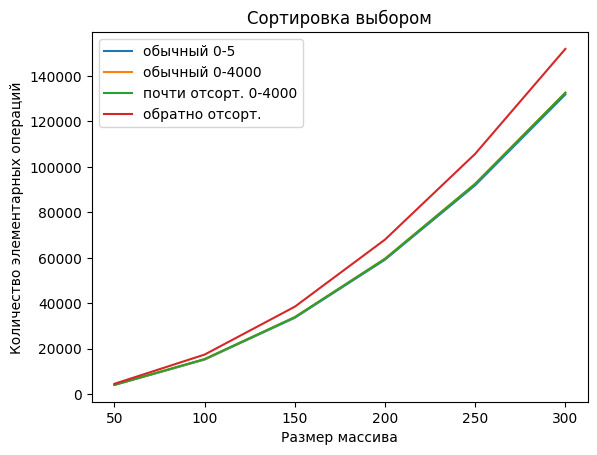

In [120]:
sort = data[(data['Sorting algorithm'] == 'сортировка выбором') & (data['Array size'] <= 300)]

array_types = sort['Type of array'].unique()

for array_type in array_types:
    array_type_rows = sort[sort['Type of array'] == array_type]
    plt.plot(array_type_rows['Array size'], array_type_rows['Elementary operations'], label=array_type)

plt.legend()
plt.title('Сортировка выбором')
plt.xlabel('Размер массива')
plt.ylabel('Количество элементарных операций')
plt.show()

**Худший случай - обратно отсортированный массив,** так как минимум для неотсортированной части массива будет всегда находиться в конце
## Сортировка простыми вставками

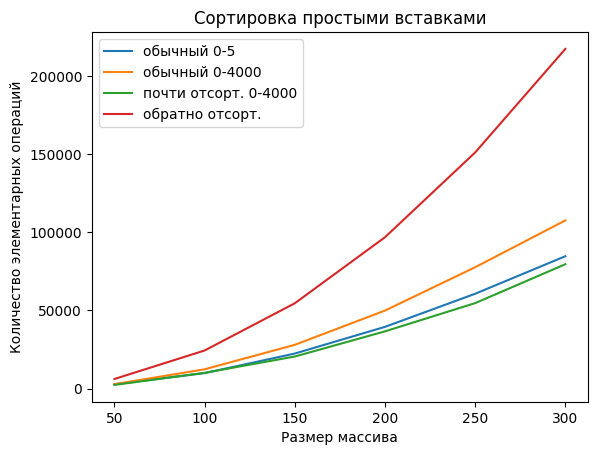

In [121]:
sort = data[(data['Sorting algorithm'] == 'сортировка простыми вставками') & (data['Array size'] <= 300)]

array_types = sort['Type of array'].unique()

for array_type in array_types:
    array_type_rows = sort[sort['Type of array'] == array_type]
    plt.plot(array_type_rows['Array size'], array_type_rows['Elementary operations'], label=array_type)

plt.legend()
plt.title('Сортировка простыми вставками')
plt.xlabel('Размер массива')
plt.ylabel('Количество элементарных операций')
plt.show()

**Худший случай обратно отсортированный массив,** потому что при линейном поиске места для вставки нам придется пройти в самое начало отсортированной части, каждый раз совершая обмены

## Сортировка бинарными вставками

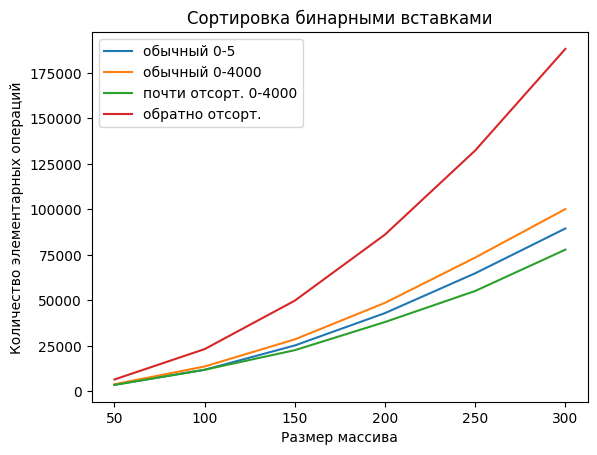

In [122]:
sort = data[(data['Sorting algorithm'] == 'сортировка бинарными вставками') & (data['Array size'] <= 300)]

array_types = sort['Type of array'].unique()

for array_type in array_types:
    array_type_rows = sort[sort['Type of array'] == array_type]
    plt.plot(array_type_rows['Array size'], array_type_rows['Elementary operations'], label=array_type)

plt.legend()
plt.title('Сортировка бинарными вставками')
plt.xlabel('Размер массива')
plt.ylabel('Количество элементарных операций')
plt.show()

Общее число операций стало меньше за счет бинарного поиска вместо линейного. Остальные тенденции сохранены
## Цифровая сортировка

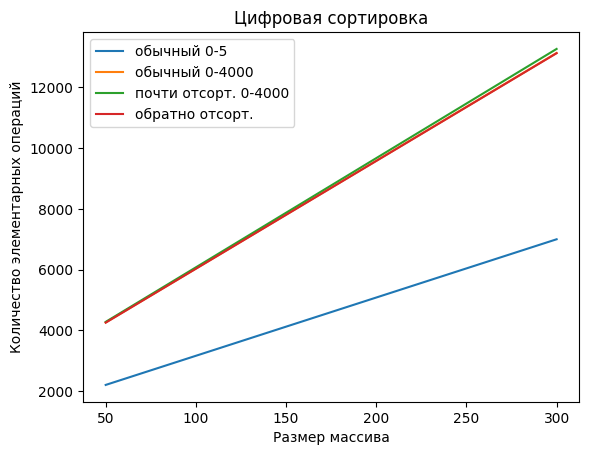

In [123]:
sort = data[(data['Sorting algorithm'] == 'цифровая сортировка') & (data['Array size'] <= 300)]

array_types = sort['Type of array'].unique()

for array_type in array_types:
    array_type_rows = sort[sort['Type of array'] == array_type]
    plt.plot(array_type_rows['Array size'], array_type_rows['Elementary operations'], label=array_type)

plt.legend()
plt.title('Цифровая сортировка')
plt.xlabel('Размер массива')
plt.ylabel('Количество элементарных операций')
plt.show()

Цифровую сортировку я делаю по разрядам в 256-ричной системе счисления. Так как у меня только в одном из четырех типов массива диапазон чисел от 0 до 5, он соответственно и выделяется на графике как самый быстрый. Остальные примерно идентичны, этого стоило ожидать

## Сортировка слиянием

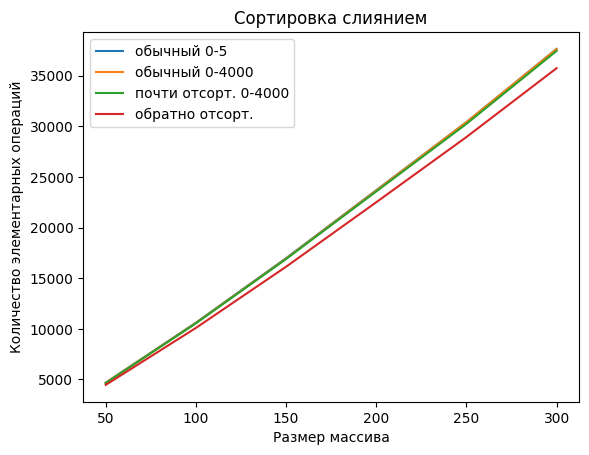

In [124]:
sort = data[(data['Sorting algorithm'] == 'сортировка слиянием') & (data['Array size'] <= 300)]

array_types = sort['Type of array'].unique()

for array_type in array_types:
    array_type_rows = sort[sort['Type of array'] == array_type]
    plt.plot(array_type_rows['Array size'], array_type_rows['Elementary operations'], label=array_type)

plt.legend()
plt.title('Сортировка слиянием')
plt.xlabel('Размер массива')
plt.ylabel('Количество элементарных операций')
plt.show()

**Сложность данного алгоритма на нашем диапазоне чисел не зависит от него, поэтому все кривые почти совпадают**
## Быстрая сортировка

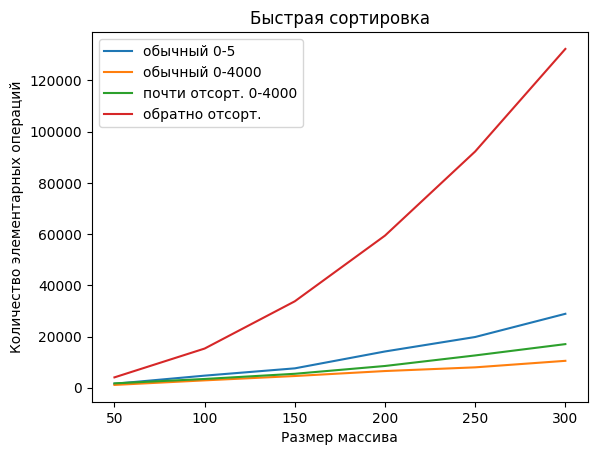

In [125]:
sort = data[(data['Sorting algorithm'] == 'быстрая сортировка') & (data['Array size'] <= 300)]

array_types = sort['Type of array'].unique()

for array_type in array_types:
    array_type_rows = sort[sort['Type of array'] == array_type]
    plt.plot(array_type_rows['Array size'], array_type_rows['Elementary operations'], label=array_type)

plt.legend()
plt.title('Быстрая сортировка')
plt.xlabel('Размер массива')
plt.ylabel('Количество элементарных операций')
plt.show()

**Худший случай - обратно отсортированный массив,** потому что в реализации с первым опорным элементов нам нужно все оставшиеся элементы ставить левее него, а это сильно увеличивает число выполняемых операций
## Пирамидальная сортировка

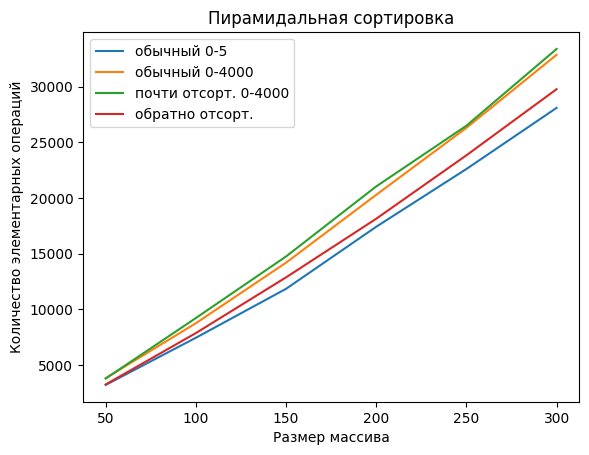

In [126]:
sort = data[(data['Sorting algorithm'] == 'пирамидальная сортировка') & (data['Array size'] <= 300)]

array_types = sort['Type of array'].unique()

for array_type in array_types:
    array_type_rows = sort[sort['Type of array'] == array_type]
    plt.plot(array_type_rows['Array size'], array_type_rows['Elementary operations'], label=array_type)

plt.legend()
plt.title('Пирамидальная сортировка')
plt.xlabel('Размер массива')
plt.ylabel('Количество элементарных операций')
plt.show()

**Сложность этого алгоритма гарантирована O(nlogn),** поэтому кривые практически совпадают

## Сортировка Шелла (последовательность Шелла)

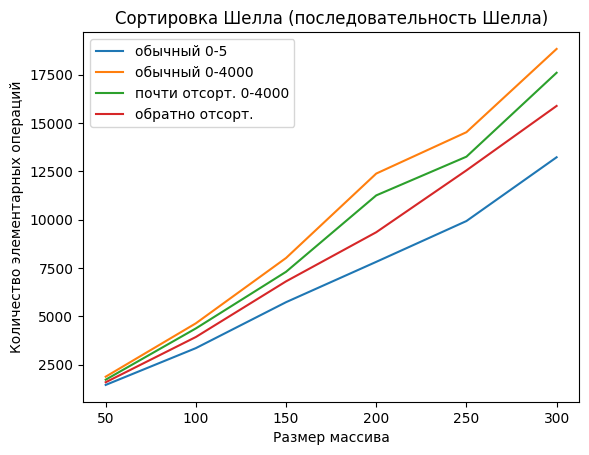

In [127]:
sort = data[(data['Sorting algorithm'] == 'сортировка Шелла(посл.Шелла)') & (data['Array size'] <= 300)]

array_types = sort['Type of array'].unique()

for array_type in array_types:
    array_type_rows = sort[sort['Type of array'] == array_type]
    plt.plot(array_type_rows['Array size'], array_type_rows['Elementary operations'], label=array_type)

plt.legend()
plt.title('Сортировка Шелла (последовательность Шелла)')
plt.xlabel('Размер массива')
plt.ylabel('Количество элементарных операций')
plt.show()

Число выполняемых операций сильно меньше, чем в других сортировках, основанных на обменах, так как мы сравниваем группы элементов, а не пары

# Построим графики для всех сортировок на массивах размеров 400-4100
## Пузырьковая сортировка

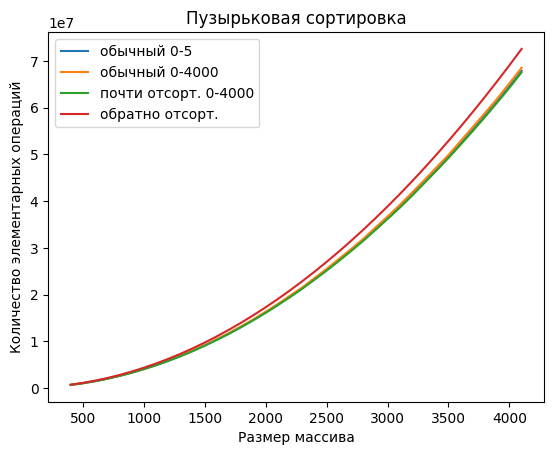

In [128]:
sort = data[(data['Sorting algorithm'] == 'пузырек(обычный)') & (data['Array size'] >= 400)]

array_types = sort['Type of array'].unique()

for array_type in array_types:
    array_type_rows = sort[sort['Type of array'] == array_type]
    plt.plot(array_type_rows['Array size'], array_type_rows['Elementary operations'], label=array_type)

plt.legend()
plt.title('Пузырьковая сортировка')
plt.xlabel('Размер массива')
plt.ylabel('Количество элементарных операций')
plt.show()

Выбросов нет, **худший случай - обратно отсортированный массив** - все, как и раннее
## Пузырьковая сортировка (Айверсон-1)

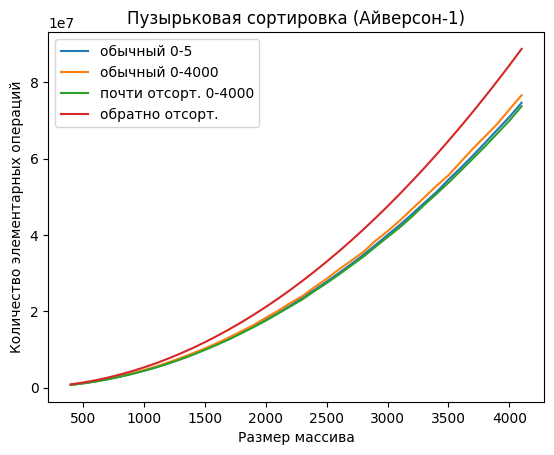

In [129]:
sort = data[(data['Sorting algorithm'] == 'пузырек(айверсон-1)') & (data['Array size'] >= 400)]

array_types = sort['Type of array'].unique()

for array_type in array_types:
    array_type_rows = sort[sort['Type of array'] == array_type]
    plt.plot(array_type_rows['Array size'], array_type_rows['Elementary operations'], label=array_type)

plt.legend()
plt.title('Пузырьковая сортировка (Айверсон-1)')
plt.xlabel('Размер массива')
plt.ylabel('Количество элементарных операций')
plt.show()

Общее число операций немного выросло из-за доп.проверок и изменений "статуса" флага, отвечающего за число обменов
## Пузырьковая сортировка (Айверсон-2)

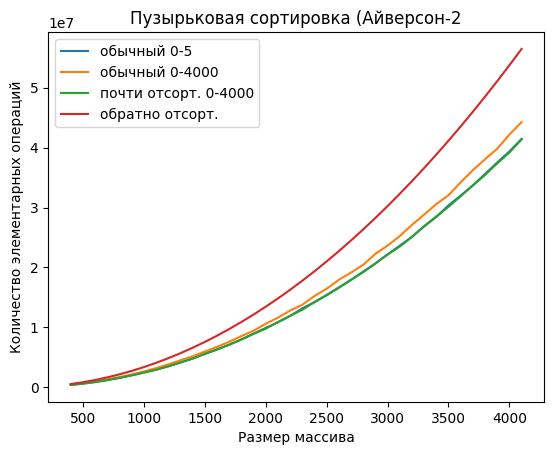

In [130]:
sort = data[(data['Sorting algorithm'] == 'пузырек(айверсон-2)') & (data['Array size'] >= 400)]

array_types = sort['Type of array'].unique()

for array_type in array_types:
    array_type_rows = sort[sort['Type of array'] == array_type]
    plt.plot(array_type_rows['Array size'], array_type_rows['Elementary operations'], label=array_type)

plt.legend()
plt.title('Пузырьковая сортировка (Айверсон-2')
plt.xlabel('Размер массива')
plt.ylabel('Количество элементарных операций')
plt.show()

Общее число операций снизилось, так как теперь мы проходим меньше элементов, так как запоминаем позицию последнего обмена и идем до нее (дальше нее массив отсортирован, раз обменов не было)
## Сортировка подсчетом

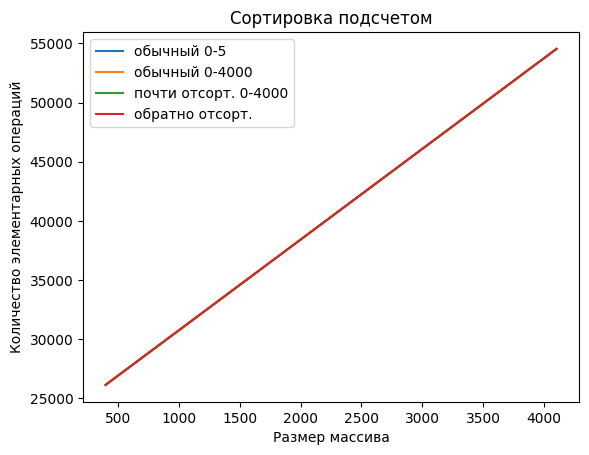

In [131]:
sort = data[(data['Sorting algorithm'] == 'сортировка подсчетом') & (data['Array size'] >= 400)]

array_types = sort['Type of array'].unique()

for array_type in array_types:
    array_type_rows = sort[sort['Type of array'] == array_type]
    plt.plot(array_type_rows['Array size'], array_type_rows['Elementary operations'], label=array_type)

plt.legend()
plt.title('Сортировка подсчетом')
plt.xlabel('Размер массива')
plt.ylabel('Количество элементарных операций')
plt.show()

**Графики точно совпадают - так и ожидалось в случае отсутствия факторов погрешности измерений**

## Сортировка выбором

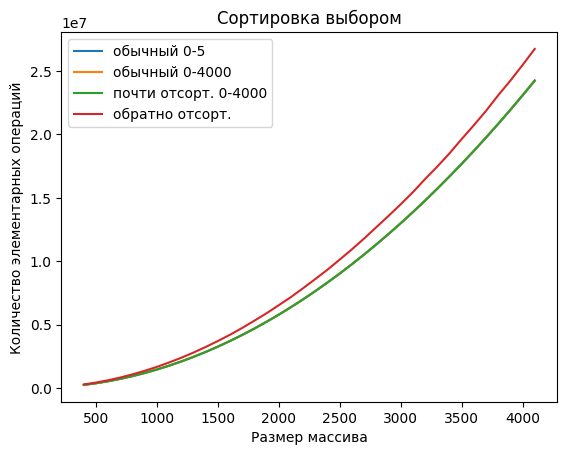

In [132]:
sort = data[(data['Sorting algorithm'] == 'сортировка выбором') & (data['Array size'] >= 400)]

array_types = sort['Type of array'].unique()

for array_type in array_types:
    array_type_rows = sort[sort['Type of array'] == array_type]
    plt.plot(array_type_rows['Array size'], array_type_rows['Elementary operations'], label=array_type)

plt.legend()
plt.title('Сортировка выбором')
plt.xlabel('Размер массива')
plt.ylabel('Количество элементарных операций')
plt.show()

**В случае обратно отсортированного массива действительно произойдет больше всего операций** при поиска очередного минимума, так как он всегда будет находиться в конце
## Сортировка простыми вставками

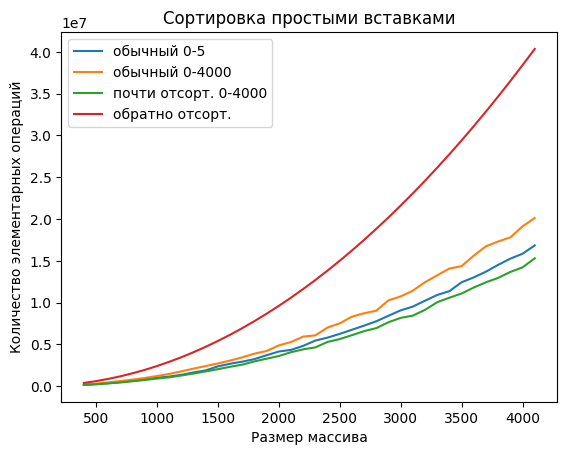

In [133]:
sort = data[(data['Sorting algorithm'] == 'сортировка простыми вставками') & (data['Array size'] >= 400)]

array_types = sort['Type of array'].unique()

for array_type in array_types:
    array_type_rows = sort[sort['Type of array'] == array_type]
    plt.plot(array_type_rows['Array size'], array_type_rows['Elementary operations'], label=array_type)

plt.legend()
plt.title('Сортировка простыми вставками')
plt.xlabel('Размер массива')
plt.ylabel('Количество элементарных операций')
plt.show()

**Худший случай - обратно отсортированный массив,** так как мы линейно ищем место для вставки и обменов будет больше всего (тк нам всегда придется свапать все элементы). Выбросы на других графиках связаны с рандомностью генерации сортируемых массивов
## Сортировка бинарными вставками

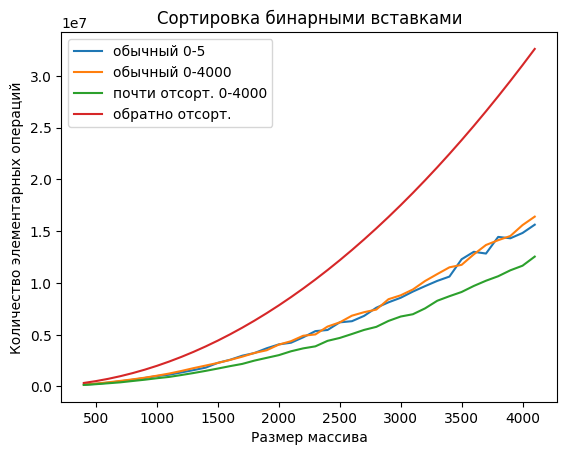

In [134]:
sort = data[(data['Sorting algorithm'] == 'сортировка бинарными вставками') & (data['Array size'] >= 400)]

array_types = sort['Type of array'].unique()

for array_type in array_types:
    array_type_rows = sort[sort['Type of array'] == array_type]
    plt.plot(array_type_rows['Array size'], array_type_rows['Elementary operations'], label=array_type)

plt.legend()
plt.title('Сортировка бинарными вставками')
plt.xlabel('Размер массива')
plt.ylabel('Количество элементарных операций')
plt.show()

Общее число операций стало меньше за счет поиска за **O(logn)** вместо **O(n).** Остальные тенденции сохранились

## Цифровая сортировка

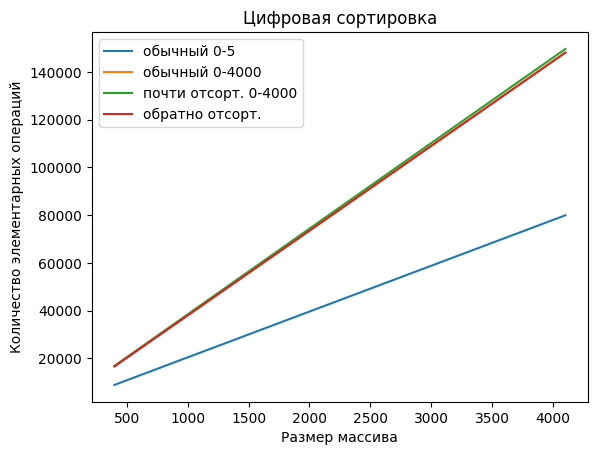

In [135]:
sort = data[(data['Sorting algorithm'] == 'цифровая сортировка') & (data['Array size'] >= 400)]

array_types = sort['Type of array'].unique()

for array_type in array_types:
    array_type_rows = sort[sort['Type of array'] == array_type]
    plt.plot(array_type_rows['Array size'], array_type_rows['Elementary operations'], label=array_type)

plt.legend()
plt.title('Цифровая сортировка')
plt.xlabel('Размер массива')
plt.ylabel('Количество элементарных операций')
plt.show()

**Самая быстрая сортировка - сортировка на самом маленьком диапазоне,** т.к меньше разрядов требуется отсортировать
## Сортировка слиянием

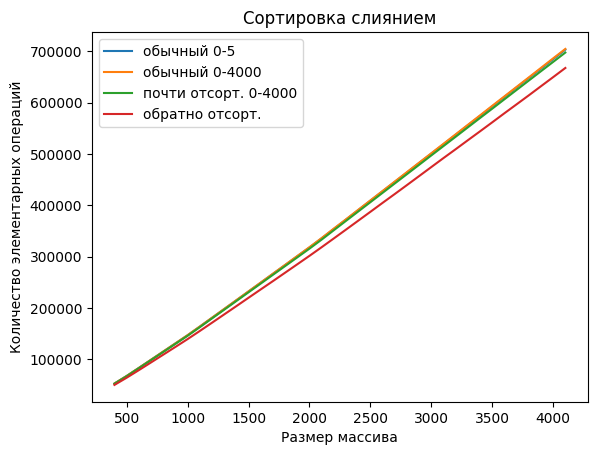

In [136]:
sort = data[(data['Sorting algorithm'] == 'сортировка слиянием') & (data['Array size'] >= 400)]

array_types = sort['Type of array'].unique()

for array_type in array_types:
    array_type_rows = sort[sort['Type of array'] == array_type]
    plt.plot(array_type_rows['Array size'], array_type_rows['Elementary operations'], label=array_type)

plt.legend()
plt.title('Сортировка слиянием')
plt.xlabel('Размер массива')
plt.ylabel('Количество элементарных операций')
plt.show()

Сортировка слиянием чуть лучше работает на обратно отсортированных массивах из-за особенностей ее реализации при слиянии двух отсортированных частей
## Быстрая сортировка

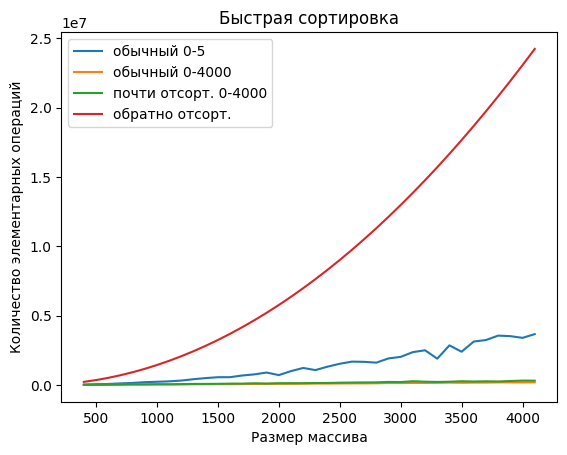

In [137]:
sort = data[(data['Sorting algorithm'] == 'быстрая сортировка') & (data['Array size'] >= 400)]

array_types = sort['Type of array'].unique()

for array_type in array_types:
    array_type_rows = sort[sort['Type of array'] == array_type]
    plt.plot(array_type_rows['Array size'], array_type_rows['Elementary operations'], label=array_type)

plt.legend()
plt.title('Быстрая сортировка')
plt.xlabel('Размер массива')
plt.ylabel('Количество элементарных операций')
plt.show()

**Быстрая сортировка в реализации с первым опорным работает медленнее всего на обратно отсортированном массиве** в силу того, что каждый раз все элементы придется ставить левее опорного - больше всего операций

## Пирамидальная сортировка

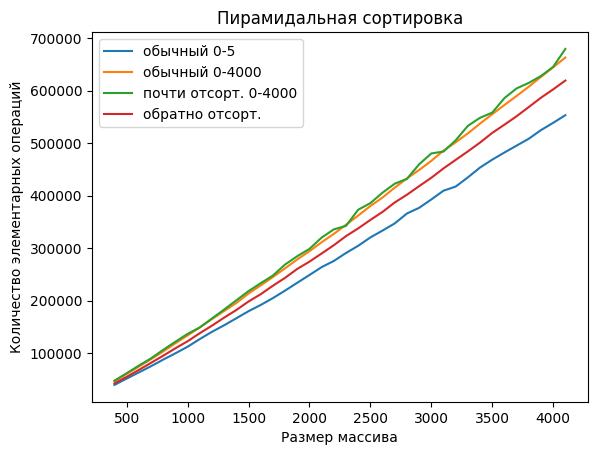

In [138]:
sort = data[(data['Sorting algorithm'] == 'пирамидальная сортировка') & (data['Array size'] >= 400)]

array_types = sort['Type of array'].unique()

for array_type in array_types:
    array_type_rows = sort[sort['Type of array'] == array_type]
    plt.plot(array_type_rows['Array size'], array_type_rows['Elementary operations'], label=array_type)

plt.legend()
plt.title('Пирамидальная сортировка')
plt.xlabel('Размер массива')
plt.ylabel('Количество элементарных операций')
plt.show()

Пирамидальная сортировка имеет **гарантировано сложность O(nlogn),** поэтому графики очень схожи - **нет ярко выраженного худшего или лучшего случаев**
## Сортировка Шелла (последовательность Шелла)

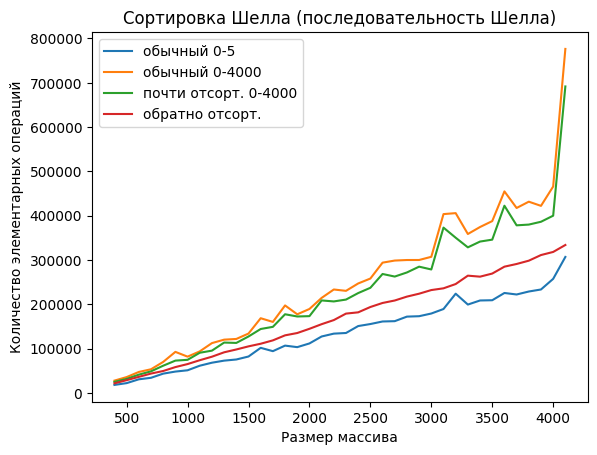

In [139]:
sort = data[(data['Sorting algorithm'] == 'сортировка Шелла(посл.Шелла)') & (data['Array size'] >= 400)]

array_types = sort['Type of array'].unique()

for array_type in array_types:
    array_type_rows = sort[sort['Type of array'] == array_type]
    plt.plot(array_type_rows['Array size'], array_type_rows['Elementary operations'], label=array_type)

plt.legend()
plt.title('Сортировка Шелла (последовательность Шелла)')
plt.xlabel('Размер массива')
plt.ylabel('Количество элементарных операций')
plt.show()

Общее число операций не очень велико по сравнению с другими сортировками, основанными на обменах, так как позволяет сравнивать группы элементов, а не пары
# Общий вывод о способе измерения
**Графики зависимости числа операций от размера массива показывают более наглядную разницу на разных типах массива. Связано это с тем, что мы минимизировали количество погрешностей, оставив только одну - человеческий фактор. Хорошая лабораторная, но графиков многовато :(**